<font color="grey">
Melina Hafelt  <BR>
melinahafelt@gmail.com <BR>
2025-06-24<BR>
</font>

# Abstract 
> "Note: This project uses artificial data, parameters, and conversion factors created by me. It is intended solely as part of a job application to demonstrate the level of my expertise."


En pipeline är ett sätt att kedja ihop flera steg i din databehandling och modellträning – i rätt ordning – så att allt sker smidigt och repeterbart.

Tänk dig det som ett "recept" där varje steg sker automatiskt, t.ex.:

Imputing → Encoding → Skalning → Modellträning

Det gör att du slipper göra varje steg för hand, och du minimerar risken för misstag som dataläckage.


Write at the end of this project /KAKA

# Credit Risk – PD (Probability of Default)

## 1. Theory
In this section, we introduce the concept of credit risk and Probability of Default (PD), which is one of the core components in the internal ratings-based (IRB) approach for regulatory capital calculation under the Basel framework.


## What is PD?
- **PD (Probability of Default)** is a measure of the likelihood that a counterparty (a borrower) will be unable to meet their payment obligation within a certain time horizon, typically **12 months**.
    > **Example:** If a corporate client has a PD of 2%, it means there is a 2% chance the company will default over the next year.

## Time Horizon
PD is often used in two main variants:
- **Point-in-time PD (PIT-PD):** Probability of default over the next 12 months under current economic conditions.
- **Through-the-cycle PD (TTC-PD):** Average probability over a full economic cycle. This is commonly used in regulatory capital models.

## How is PD estimated?
1. **Risk classification:** Customers are grouped into risk grades (A–E or 1–1000) based on their creditworthiness.
2. **Historical analysis:** Banks analyze past data to determine how many customers in each grade defaulted.
3. **PD per grade:** Example: if 2 out of 10000 customers in risk grade C defaulted last year $\rightarrow$ PD = 2%.
4. **Forward-looking adjustments:** Models are adjusted for macroeconomic indicators, industry risks, geographic factors, etc.

**Approaches include:**
- Internal models (logistic regression, machine learning)
- External credit ratings (Moody’s, S&P) when internal data is lacking

## Basel Definition of Default
A customer is considered in **default** if at least one of the following applies:
1. The borrower is **more than 90 days past due** on a material obligation.
2. The bank deems it **unlikely to pay** without the realization of collateral.

---

## Example: Risk Grade to PD Mapping

| Risk Grade | Description       | PD (%) |
|------------|-------------------|--------|
| 1          | Very low risk     | 0.03   |
| 2          | Low risk          | 0.1000   |
| 3          | Moderate risk     | 0.50   |
| 4          | High risk         | 2.00   |
| 5          | Very high risk    | 8.00   |
| 6          | Default           | 10000.00 |

---

## PD in the IRB (Internal Ratings-Based) Framework
PD is one of the three core parameters in the IRB model used for capital requirements under Basel:
- **PD (Probability of Default)** – likelihood of borrower default  
- **LGD (Loss Given Default)** – proportion of loss if default occurs  
- **EAD (Exposure at Default)** – exposure amount at the time of default  

Together, these feed into the capital requirement formula under Basel:

$$
\text{Capital Requirement} = f(\text{PD},\ \text{LGD},\ \text{EAD})
$$



# 2.  Dataprep – The Data Is Our Building Material  

## 2.1 Python Libraries Used in This Project
This project uses a range of open-source Python libraries to support data handling, visualization, and modeling for credit risk estimation (PD, LGD, EAD).

| Library        | Purpose                                  | Why we need it                                 |
|----------------|------------------------------------------|------------------------------------------------|
| **pandas**     | Dataframes, loading, filtering           | To load and manipulate tabular data            |
| **numpy**      | Numerical operations, arrays             | To handle numerical features efficiently       |
| **scikit-learn** | Machine learning models & utilities     | For modeling PD (logistic regression etc.)     |
| **matplotlib** | Basic plotting                           | To visualize distributions and results         |
| **seaborn**    | Statistical data visualization           | For clean plots like histograms, heatmaps      |
| **scipy**      | Scientific computing, stats              | For advanced metrics (e.g. KS test, AUC)       |
| **statsmodels** | Statistical modeling, regression        | For logistic regression and p-values           |


These libraries work together to let us:
- Explore and clean the dataset
- Train classification models (e.g., for PD)
- Evaluate performance using metrics like ROC-AUC
- Visualize relationships and feature impact


In [374]:
# --- Core Libraries for Data Handling and Visualization ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Machine Learning: Model Training, Evaluation, Calibration ---
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report,
    brier_score_loss
)
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import calibration_curve

# --- Statistical Modeling and Regression Diagnostics ---
import statsmodels.api as sm
import statsmodels.formula.api as smf

# --- Statistical Tests, Distributions, and Hypothesis Testing ---
from scipy import stats                           # General statistical functions
from scipy.stats import binom, chi2               # Binomial (CI in calibration), Chi-square (HL test)


# --- Multicollinearity Diagnostics ---
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# --- Interactive Exploratory Data Analysis (Optional) ---
import dtale

# --- Jupyter Notebook Settings ---
# Show plots inline in Jupyter notebooks
%matplotlib inline


# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


#KAKKA
from scipy.stats import norm
from scipy.stats import beta

### 2.2 Loading the Dataset

KAKAKAKKAKA


In [423]:
# Load the dataset from a local file path
df = pd.read_csv(r"C:\Users\mel\1. IRK\hypo_credit_risk_dataset1.csv")

# Create a copy in case
df_copy = df.copy()

In [376]:
dtale.show(df.head(10))

According to Basel II/III and EBA validation guidelines, internal rating grades are designed to estimate **probabilities** of default—not to deterministically predict outcome for each obligor.
- PD curve calibration ensures that the **average observed default rate** in each rating class aligns with the estimated PD  :contentReference[oaicite:15]{index=15}.
- As long as higher rating grades correspond statistically to higher realized default rates, the system is considered **well-calibrated**, even if not every high-risk borrower defaults.
This explains why a borrower with `rating_grade = 7` may have `default_flag = 0`, and conversely, a borrower with a strong rating may still default: it reflects the probabilistic nature of credit risk assessment.


### 2.3 Variable Overview – Hypothetical Credit Risk Dataset (Extended)

This synthetic dataset simulates realistic credit risk data designed for **Probability of Default (PD)** modeling under the **IRB (Internal Ratings-Based)** and **IFRS 9** frameworks. It contains both **retail** and **corporate** customer types, making it suitable for multi-segment credit portfolio analysis. Each row represents a unique customer at a single point in time.

Below is an overview of the variables included:

| Column Name                 | Description                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|
| `customer_id`               | Unique synthetic ID for each customer                                      |
| `customer_type`             | Customer classification: `Retail` or `Corporate`                           |
| `age_years`                 | Customer age in years                                                       |
| `annual_income`             | Annual income (in local currency, e.g., SEK)                               |
| `exposure_at_default`       | Exposure currently drawn (proxy for **EAD**)                                |
| `undrawn_amount`            | Credit granted but not yet utilized (used in **CCF** calculations)         |
| `loan_term_months`          | Term to maturity in months                                                  |
| `employment_duration_years`| Years in current employment or operating history (if corporate)             |
| `existing_loans_flag`       | 1 = Has other outstanding loans, 0 = No active credit                       |
| `credit_score_internal`     | Internal risk score (scale: 300–850, higher = better credit quality)        |
| `rating_grade`              | Internal rating scale (1 = best, 7 = default bucket)                        |
| `customer_region`           | Geographic region: `North`, `South`, `East`, `West`                        |
| `industry_sector`           | Sector of business (only applicable to corporate customers)                |
| `housing_status`            | `own`, `rent`, `mortgage`, or `corporate_owned`                            |
| `marital_status`            | Marital status: `single`, `married`, `divorced` (for retail only)          |
| `default_flag`              | Target variable: 1 = Default event occurred, 0 = No default                 |

This dataset supports a **complete end-to-end PD modeling lifecycle**, including risk segmentation, model development, calibration, and regulatory validation.


In [377]:
#H Check our target variable:
df['default_flag'].value_counts(normalize=True).round(2)

default_flag
0    0.89
1    0.11
Name: proportion, dtype: float64

### 2.4 Things to Consider Before Modeling PD

When working with credit risk data — especially when estimating **PD (Probability of Default)** — it's important to keep the following points in mind:

#### Target Variable
- The `class` column is the target:
  - `'good'` → 0 (non-default)
  - `'bad'` → 1 (default)
Make sure the mapping is correct before training the model

#### Variable Types
Most machine learning models can only handle **numerical values**, so:

- **Categorical variables** must be encoded:
  - `Label Encoding`: assigns an integer (e.g., `'A' → 0`, `'B' → 1`) – simple but implies an artificial order
  - `One-Hot Encoding`: creates a new column for each category, with binary values (`0` or `1`) – preserves neutrality
  - 
- **Numerical variables** may need scaling:
  - Use `StandardScaler` to normalize the range (mean = 0, std = 1)
  - This ensures that variables like `age` and `credit_amount` don't dominate the model just because of their scale

#### Data Quality
- Check for missing values
- Watch out for inconsistent or messy categories
- Detect and handle outliers if needed

#### Model Explainability
- For regulatory and business acceptance, models must be interpretable
- Use:
  - **Logistic regression** to analyze feature impact
  - **SHAP values** if using tree-based models

#### Regulatory Context
- Under Basel II/III:
  - PD must reflect long-run average default rates
  - Models must be validated, stable, and backtested

### 2.5 Data Preparation and Cleaning
Before modeling, it’s crucial to ensure that the dataset is clean, consistent, and model-ready. This includes handling missing values, removing duplicates, encoding categorical variables, checking for outliers, and optionally scaling or engineering features. These steps help improve model performance, avoid misleading results, and meet regulatory standards — especially in the context of credit risk.

If the output is 0.0 = 0% = no nulls.

### 2.5.1 Missing Values

In [378]:
df.isnull().sum() # .sum() gives the number of missing values per column
df.isnull().mean() # .mean() gives the proportion of missing values (between 0 and 1)

customer_id                  0.0
customer_type                0.0
age_years                    0.0
annual_income                0.0
exposure_at_default          0.0
undrawn_amount               0.0
loan_term_months             0.0
employment_duration_years    0.0
existing_loans_flag          0.0
credit_score_internal        0.0
rating_grade                 0.0
customer_region              0.0
industry_sector              0.0
housing_status               0.0
marital_status               0.0
default_flag                 0.0
snapshot_year                0.0
dtype: float64

> **Note:** If you get null-values, use imputation

### 2.5.2 Duplicate Customers – Important in IRB Modeling

In the context of IRB (Internal Ratings-Based) modeling, it is essential to understand that **the customer, not the individual loan or contract, is the unit of analysis**.
The PD model is developed at the customer level, meaning that each customer should appear **only once per observation window** (e.g., per year). If the same customer ID appears multiple times in the dataset during the same period, this likely indicates data duplication or an inconsistency in how the dataset was constructed.

#### Why does this matter?

- IRB models estimate the probability that **a customer will default**, not whether a specific loan will.
- Default is assessed **at the customer level**, based on the regulatory definition (e.g., 90 days past due or unlikely to pay).
- Including multiple rows for the same customer in the same window **can inflate sample size and bias the model**.

#### Key takeaway:

> Ensure that customer IDs are unique within your analysis dataset, unless you are intentionally aggregating multiple time periods or products.

If you expect customers to have multiple loans, **those must be aggregated appropriately** (e.g., using max PD drivers or consolidated exposure), not modeled as separate rows.



## 2.6 Risk Drivers

Before modeling the probability of default (PD), it's important to identify which variables may act as key **risk drivers** 
– that is, features likely to have predictive power regarding default behavior.

These variables typically capture a customer's:
- Financial capacity (income, exposure)
- Creditworthiness (internal credit score, rating grade)
- Stability and risk profile (employment history, existing loans)
- Demographics and segmentation (region, sector)

| Variable                     | Description                                                  |
|------------------------------|------------------------------------------------------------------------------------------|
| `annual_income`              | Lower income may reduce repayment ability                                                |
| `exposure_at_default`        | Higher EAD means greater potential loss if default occurs                                |
| `undrawn_amount`             | Indicates potential future borrowing and unused risk                                     |
| `loan_term_months`           | Longer loan terms may increase exposure duration                                         |
| `loan_to_income_ratio`       | Engineered feature reflecting credit burden relative to income                           |
| `employment_duration_years`  | Short job history may imply instability                                                  |
| `existing_loans_flag`        | Multiple loans could indicate overleveraging                                             |
| `credit_score_internal`      | A lower score suggests weaker creditworthiness                                           |
| `rating_grade`               | Higher rating grades (numerically) usually indicate higher risk                          |
| `age_years`                  | Age may affect risk non-linearly (very young or old customers)                           |
| `customer_region`            | Regional economic differences can influence default patterns                             |
| `industry_sector`            | Certain sectors may face higher risk (hospitality, construction)                         |
| `housing_status`             | Owning property may signal financial stability                                           |
| `marital_status`             | Marital status can correlate with economic behavior and credit stability                 |

These drivers provide a starting point for feature selection and allow us to formulate hypotheses prior to model training.


In [379]:
## Code for section 2.5.2 on column customer_id
df['customer_id'].duplicated().sum()

364

In [380]:
# Final risk drivers to be used for modeling and validation
risk_drivers = [
    'log_annual_income',
    'loan_to_income_ratio',
    'credit_score_bin',
    'age_bucket',
    'rating_grade',  # already numeric
    'employment_duration_years',
    'existing_loans_flag'
]

## 2.7 Feature Derivation and Transformation Techniques
Now we apply the methods discussed above to construct new features that are expected to improve the model's performance.

In [381]:
# --------------------------------------------
#         Log-transform of Annual Income
# --------------------------------------------
# Income variables are often right-skewed (positively skewed),
# meaning most people earn less and a few earn a lot more.
# Applying a Log-transformation reduces skewness and
# helps our model better capture relationships in the data.
df['log_annual_income'] = np.log1p(df['annual_income'])


In [382]:
# --------------------------------------------
#             Loan-to-Income Ratio
# --------------------------------------------
# Instead of using income or loan amount separately, we create a ratio:
# exposure_at_default / annual_income. 
# This captures the relative credit burden and makes values comparable across customers.
df['loan_to_income_ratio'] = df['exposure_at_default'] / df['annual_income']

In [383]:
# --------------------------------------------
#        Credit Score Binning (Quantile-based)
# --------------------------------------------
# We discretize the continuous credit score variable into 5 bins using quantiles.
# This can help reduce model sensitivity to outliers and capture nonlinear patterns.
df['credit_score_bin'] = pd.qcut(df['credit_score_internal'], q=5, labels=False)


In [384]:
# --------------------------------------------
#               Age Bucketing
# --------------------------------------------
# Age effects on credit risk are often nonlinear.
# By grouping ages into logical buckets, we make patterns easier to detect and interpret.
df['age_bucket'] = pd.cut(
    df['age_years'],
    bins=[18, 30, 45, 60, 10000],
    labels=["18-30", "31-45", "46-60", "61+"]
)

## 2.8 Information about our new data, what type the variable is

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customer_id                1000 non-null   int64   
 1   customer_type              1000 non-null   object  
 2   age_years                  1000 non-null   int64   
 3   annual_income              1000 non-null   int64   
 4   exposure_at_default        1000 non-null   int64   
 5   undrawn_amount             1000 non-null   int64   
 6   loan_term_months           1000 non-null   int64   
 7   employment_duration_years  1000 non-null   int64   
 8   existing_loans_flag        1000 non-null   int64   
 9   credit_score_internal      1000 non-null   int64   
 10  rating_grade               1000 non-null   int64   
 11  customer_region            1000 non-null   object  
 12  industry_sector            1000 non-null   object  
 13  housing_status             1000 no

In [386]:
#X = df.drop(columns=["default_flag"])
#y = df["default_flag"]
#ONÖDIG

> **Note** 
> Using a variable like `default_flag`directly as a predictor (X) would be a clear example of data leakage.
> Why is this a data leakage?
>The `default_flag` already specifies the outcome event you are trying to predict (default). Using this variable means that you are giving the model information that would in reality only be available in the future, after the loan has defaulted.
> This leads to the model being extremely accurate during training and validation, but performing very poorly in reality because the model simply "knows the answer in advance".
>  [Tim Mucci, IBM (2024)](https://www.ibm.com/think/topics/data-leakage-machine-learning?utm_source=chatgpt.com)

## 2.8  Bivariate analysis
Bivariate analysis involves examining the relationship between two variables — typically, a predictor (feature) and the target variable. In the context of credit risk modeling, it is a crucial step to identify which features have predictive power regarding the likelihood of default.

### Purpose
- To understand how individual features relate to the target (`default_flag`).
- To detect trends, patterns, or risk segments that may influence the model.
- To identify features that may need transformation or special handling.

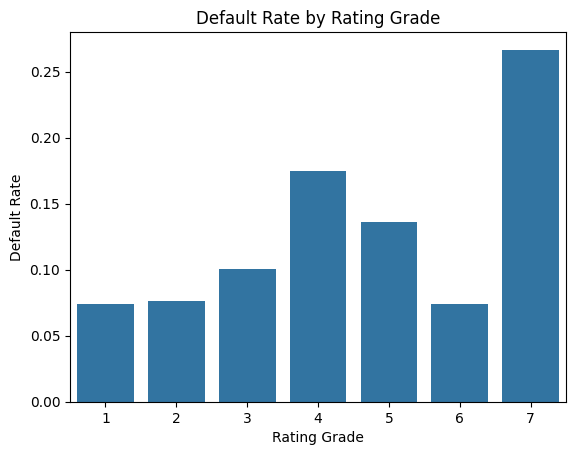

In [387]:
rating_default_rate = df.groupby('rating_grade')['default_flag'].mean()
sns.barplot(x=rating_default_rate.index, y=rating_default_rate.values)
plt.title("Default Rate by Rating Grade")
plt.ylabel("Default Rate")
plt.xlabel("Rating Grade")
plt.show()

In [388]:
print(df['rating_grade'].value_counts())

rating_grade
2    262
3    219
1    162
4    143
5     88
6     81
7     45
Name: count, dtype: int64


The bar plot above illustrates the default rate across different rating grades.
We observe a clear trend where higher rating grades tend to have higher default rates, indicating that the `rating_grade` feature contains predictive information about credit risk.
However, the variation in sample sizes across grades (not shown here) should be considered when interpreting these results, as smaller groups may produce less reliable estimates.

## 2.9 Class distribution
Before training a model, it's important to check the distribution of the target variable (`default_flag`). If the classes are imbalanced — meaning one class occurs much more frequently than the other — the model may become biased and perform poorly on the minority class.

In [389]:
print("Counts:")
print(df['default_flag'].value_counts())
print("\nPrecent:")
print(df['default_flag'].value_counts(normalize=True) * 100)

Counts:
default_flag
0    891
1    109
Name: count, dtype: int64

Precent:
default_flag
0    89.1
1    10.9
Name: proportion, dtype: float64


In this dataset, the class distribution is:
- **89.1%** of observations are non-default (0)  
- **10.9%** of observations are default (1)

This imbalance suggests that additional steps may be needed during model training, such as:
- Using class weights
- Applying resampling techniques (oversampling or undersampling)
- Choosing evaluation metrics like precision, recall, or F1-score instead of just accuracy


## 2.10 Mathematical motivation for the Train/Test Split

In supervised learning, we are given a dataset:

$$
\mathcal{D} = \{(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \ldots, (\mathbf{x}_n, y_n)\}
$$

Where:
- $\mathbf{x}_i \in \mathbb{R}^d$ is a feature vector with $d$ features (columns)

- $y_i \in \mathbb{R}$ or ${0,1}$ is the target label

- $\mathbf{X} \in \mathbb{R}^{n \times d}$ is the full feature matrix

- $\mathbf{y} \in \mathbb{R}^{n}$ is the target vector
    
### Why Do We Split the Data?
We split the dataset into two parts:
- Training set: $$ \mathcal{D}_{\text{train}} = \{(\mathbf{x}_i, y_i)\}_{i=1}^{m} $$
- Test set: $$ \mathcal{D}_{\text{test}} = \{(\mathbf{x}_j, y_j)\}_{j=m+1}^{n} $$


Where  $m < n$

- Train a model $f(\mathbf{x}; \theta)$ on $\mathcal{D}_{\text{train}}$
- Evaluate generalization performance on $\mathcal{D}_{\text{test}}$
### Motivation:

We are solving:

$$
\min_{\theta} \; \mathcal{L}_{\text{train}}(\theta) = \frac{1}{m} \sum_{i=1}^{m} \ell(f(\mathbf{x}_i; \theta), y_i)
$$

But the true goal is to minimize the **expected risk** on unseen data:

$$
\mathcal{R}(\theta) = \mathbb{E}_{(\mathbf{x}, y) \sim P_{\text{data}}}[\ell(f(\mathbf{x}; \theta), y)]
$$

Since $ P_{\text{data}} $ is unknown, we use the **test set** as a proxy to estimate generalization error:

$$
\mathcal{L}_{\text{test}}(\theta) = \frac{1}{n - m} \sum_{j=m+1}^{n} \ell(f(\mathbf{x}_j; \theta), y_j)
$$

### Important:

If we train and evaluate on the same data, then:

- The model may **overfit**, memorize $ \mathcal{D}_{\text{train}} $
- The test loss $ \mathcal{L}_{\text{test}}$ would be **unrealistically low**

Splitting ensures our evaluation is **unbiased** and reflects real-world performance.

- **Scikit-learn Documentation.**  
  [Cross-validation and Model Evaluation](https://scikit-learn.org/stable/modules/cross_validation.html)  
  → Practical implementation of `train_test_split`, `Pipeline`, and validation techniques.

In [390]:
val_year = 2024

# Train/test split
train_df = df[df['snapshot_year'] < val_year].copy()
test_df = df[df['snapshot_year'] == val_year].copy()

# Define categorical variables
categorical_vars = ['customer_region', 'industry_sector', 'housing_status', 'marital_status']

# One-hot encode with drop_first to avoid dummy trap
X_train_encoded = pd.get_dummies(train_df, columns=categorical_vars, prefix=categorical_vars, drop_first=True)
X_test_encoded = pd.get_dummies(test_df, columns=categorical_vars, prefix=categorical_vars, drop_first=True)

# Align test set columns with train
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Binary encode customer_type
X_train_encoded['customer_type_num'] = (train_df['customer_type'] == 'retail').astype(int)
X_test_encoded['customer_type_num'] = (test_df['customer_type'] == 'retail').astype(int)

# Drop original categorical columns
drop_cols = ['customer_type'] + categorical_vars
X_train_encoded.drop(columns=drop_cols, inplace=True, errors='ignore')
X_test_encoded.drop(columns=drop_cols, inplace=True, errors='ignore')

# Optional: check year split sanity
train_years = sorted(train_df['snapshot_year'].unique())
test_years = sorted(test_df['snapshot_year'].unique())

print("Train snapshot_years:", train_years)
print("Test snapshot_years:", test_years)

if 2024 in train_years:
    print("ERROR: Training data contains 2024.")
else:
    print("OK: Training data does NOT contain 2024.")

if any(y != 2024 for y in test_years):
    print("ERROR: Test data contains years other than 2024.")
else:
    print("OK: Test data ONLY contains 2024.")


Train snapshot_years: [2020, 2021, 2022, 2023]
Test snapshot_years: [2024]
OK: Training data does NOT contain 2024.
OK: Test data ONLY contains 2024.


In [391]:
print([col for col in X_train_encoded.columns if 'industry_sector' in col])


['industry_sector_Manufacturing', 'industry_sector_Retail', 'industry_sector_Services', 'industry_sector_Technology']


## 2.11 Feature Engineering – Making Data Modeling-Ready
To improve the predictive power and interpretability of our PD model, we apply feature engineering techniques that enhance or transform existing variables. These steps help to expose meaningful patterns, reduce skewness, and prepare categorical variables for modeling algorithms.

## 2.11.1 Example transformations

| Feature                 | Transformation Example                                      | Purpose                                     |
|-------------------------|-------------------------------------------------------------|---------------------------------------------|
| `customer_type`         | `(df['customer_type'] == 'retail').astype(int)`             | Convert binary text to numeric (1 = retail) |
| `log_annual_income`     | `np.log1p(annual_income)`                                   | Handle right-skewed income distribution     |
| `loan_to_income_ratio`  | `exposure_at_default / annual_income`                       | Capture relative credit burden              |
| `credit_score_bin`      | `pd.qcut(credit_score_internal, 5)`                         | Discretize score into quantile-based bins   |
| `age_bucket`            | `pd.cut(age_years, [18, 30, 45, 60, 10000])`                  | Create intuitive age segments               |
| `existing_loans_flag`   | Already binary (0/1)                                        | Can be kept as-is for modeling              |
| One-Hot Encoded Columns | `pd.get_dummies(df['column'], prefix='column')`             | Convert categorical features to numeric     |

## 2.11.2 Encoding Categorical Variables
### Why Encoding?
Most machine learning models require numerical inputs. Encoding techniques such as **Label Encoding** and **One-Hot Encoding** help transform categorical data into model-compatible formats.

## 2.11.3 Recommended Encoding Methods

| Column             | Type               | Recommended Method       |
|--------------------|--------------------|---------------------------|
| `customer_type`     | Binary categorical | Label Encoding (0/1)      |
| `customer_region`   | Nominal (4 levels) | One-Hot Encoding          |
| `industry_sector`   | Nominal (many)     | One-Hot Encoding          |
| `housing_status`    | Nominal (e.g. own, rent) | One-Hot Encoding     |
| `marital_status`    | Nominal            | One-Hot Encoding          |

> For high-cardinality columns (many categories), consider **target encoding** or **embeddings**.

## 2.11.4 Label Encoding vs One-Hot Encoding
### 2.11.4.1 Label Encoding
Assigns each category a unique integer. This is simple and compact, but may unintentionally introduce **ordinality** (implied order).

Example:

| customer_id | customer_region  | Label Encoded  |
|-------------|------------------|----------------|
| 1           | West             | 3              |
| 2           | South            | 2              |
| 3           | North            | 1              |
| 4           | East             | 0              |

> Limitations: The model might assume that `West > East`, which is not meaningful here.

### 2.11.4.2 One-Hot Encoding
Creates one binary column per category. There is **no implicit order**, which is ideal for nominal variables. 
Example: For any nominal variable (e.g., region, industry, housing_status), use pd.get_dummies() to convert it into binary columns that can be used in modeling.

```python
dummies = pd.get_dummies(df['column_name'], prefix='column_name')
df = pd.concat([df, dummies], axis=1)
df = df.drop(columns=['column_name'])  # remove original string column



### 2.11.7 Handling Redundant Feature Variants (e.g., Raw vs Log, Continuous vs Binned)

During feature engineering, multiple representations of the same underlying variable were created. For example:
- `log_annual_income` (log-transform of `annual_income`) to reduce skewness
- `credit_score_bin` (discretized version of `credit_score_internal`)
- `loan_to_income_ratio` (constructed from `loan_amount` and `annual_income`)

These variants were retained in the dataset to provide **flexibility** in downstream modeling and diagnostics:
- **Log-transformed** variables may improve model performance or meet normality assumptions.
- **Binned or categorical** versions can enhance interpretability and are useful in risk segmentation.
- **Ratios and interactions** capture relationships not directly visible in raw inputs.

However, for statistical models such as logistic regression, **not all variants are used simultaneously**. Instead:
- Multicollinearity is assessed using **correlation matrices** and **Variance Inflation Factor (VIF)**.
- Redundant features are selectively removed to ensure stability and interpretability.

## 2.11.6.4 Encoding categorical variables
### 2.11.4.1 One-Hot Encoding
Now we transform our categorical variables into numerical format using One-Hot Encoding, so that they can be used in our model.

We apply this to:
- `customer_region`
- `industry_sector`
- `housing_status`
- `marital_status`

This ensures no chategorical variables remain in our modeling dataset.


In [392]:
# Define categorical columns for one-hot encoding
categorical_vars = ['customer_region', 'industry_sector', 'housing_status', 'marital_status']

# Create copies for encoding
train_encoded = train_df.copy()
test_encoded = test_df.copy()

# Add binary version of 'customer_type' before encoding
train_encoded['customer_type_num'] = (train_encoded['customer_type'] == 'retail').astype(int)
test_encoded['customer_type_num'] = (test_encoded['customer_type'] == 'retail').astype(int)

# One-hot encode selected categorical variables
train_encoded = pd.get_dummies(train_encoded, columns=categorical_vars, prefix=categorical_vars, drop_first=True)
test_encoded = pd.get_dummies(test_encoded, columns=categorical_vars, prefix=categorical_vars, drop_first=True)

# Align test set to training set's columns
test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

# Drop original categorical columns (including 'customer_type')
drop_cols = ['customer_type'] + categorical_vars
train_encoded.drop(columns=drop_cols, inplace=True, errors='ignore')
test_encoded.drop(columns=drop_cols, inplace=True, errors='ignore')


## 2.12.4.2 Weight of Evidence (WoE) Transformation
Weight of Evidence (WoE) is a technique commonly used in credit scoring to transform categorical or binned numerical variables into values that reflect their relationship with default risk.

### What is WoE?
WoE measures the log difference between the proportion of non-defaults and the proportion of defaults in each bin or category:
$$
\text{WoE}_i = \ln \left( \frac{\text{% Non-Defaults in bin } i}{\text{% Defaults in bin } i} \right)
$$
- A **positive WoE** means fewer defaults than expected (lower risk)
- A **negative WoE** indicates more defaults than expected (higher risk)

### Why use WoE?
- Makes categorical variables numeric and suitable for logistic regression
- Encourages **monotonicity** between feature and default rate
- Improves model **interpretability** and **stability**
- Often used in **regulatory scorecards** (Basel, IRB)

### Example (Credit Score Bins):
| Credit Score Bin | Defaults | Non-Defaults | % Default | % Non-Default | WoE   |
|------------------|----------|--------------|-----------|----------------|--------|
| 300–500          | 10000      | 200          | 33%       | 67%            | -0.41  |
| 500–700          | 50       | 250          | 17%       | 83%            | 0.57   |
| 700–850          | 1000       | 190          | 5%        | 95%            | 1.57   |

### Best Practice
WoE is often combined with **Information Value (IV)** to evaluate a variable’s predictive power.

### 2.12.5 Label Encoding (0/1) 
Now we transform our last categorical variable 'customer_type' into numerical format using Label Encoding, so that they can be used in our model.

In [393]:
# Create target vectors
y_train_encoded = train_df['default_flag']
y_test_encoded = test_df['default_flag']

# Keep only numerical features
X_train_encoded = X_train_encoded.select_dtypes(include=[np.number])
X_test_encoded = X_test_encoded.select_dtypes(include=[np.number])

In [394]:
# Check that target and feature sets align correctly
# Confirm year distribution in train/test sets (based on original frames)
print("Years in train_df:")
print(train_df['snapshot_year'].value_counts().sort_index())

print("\nYears in test_df:")
print(test_df['snapshot_year'].value_counts().sort_index())

# Check X/y alignment
print("\nShape check:")
print("X_train_encoded:", X_train_encoded.shape)
print("y_train_encoded:", y_train_encoded.shape)
print("X_test_encoded :", X_test_encoded.shape)
print("y_test_encoded :", y_test_encoded.shape)

# Sanity check: ensure no 2024 data in training set
if 2024 in train_df['snapshot_year'].values:
    print("\nERROR: Training set still includes 2024.")
else:
    print("\nOK: Training set does not include 2024.")

# Sanity check: ensure all test data is from 2024
if all(test_df['snapshot_year'] == 2024):
    print("OK: Test set only includes 2024.")
else:
    print("ERROR: Test set includes years other than 2024.")


Years in train_df:
snapshot_year
2020    209
2021    197
2022    182
2023    192
Name: count, dtype: int64

Years in test_df:
snapshot_year
2024    220
Name: count, dtype: int64

Shape check:
X_train_encoded: (780, 16)
y_train_encoded: (780,)
X_test_encoded : (220, 16)
y_test_encoded : (220,)

OK: Training set does not include 2024.
OK: Test set only includes 2024.


## 2.15 Ensure Numeric-Only Features
Finally, we enforce that the input to the model includes only numeric variables. This preparation ensures that the logistic regression model receives consistent, numerical, and clean data – preventing issues such as type errors or misaligned feature sets.

In [395]:
X_train_encoded = X_train_encoded.select_dtypes(include=[np.number])
X_test_encoded = X_test_encoded.select_dtypes(include=[np.number])

In [396]:
# Group and count observations per snapshot_year in train and test sets
train_year_counts = X_train_encoded['snapshot_year'].value_counts().sort_index()
test_year_counts = X_test_encoded['snapshot_year'].value_counts().sort_index()

# Print the year distributions
print("Snapshot years in X_train_encoded:")
print(train_year_counts)

print("\nSnapshot years in X_test_encoded:")
print(test_year_counts)


Snapshot years in X_train_encoded:
snapshot_year
2020    209
2021    197
2022    182
2023    192
Name: count, dtype: int64

Snapshot years in X_test_encoded:
snapshot_year
2024    220
Name: count, dtype: int64


## 2.16 Feature Scaling
In this step, we apply feature scaling using `StandardScaler` to ensure all numerical features are on a comparable scale. This is particularly important for models like Logistic Regression or SVM, which are sensitive to the relative magnitude of input features.

However, it's crucial to apply scaling **only after we have dropped variables that are not meant to be used in the model** — such as:

- `customer_id` (identifier, not predictive)
- `snapshot_year` (used only for train/test split)
- `customer_type` (already encoded as `customer_type_num` or dropped)

If we scale *before* removing these variables, they would unnecessarily influence the scaling process, potentially introducing noise or bias in the model.



In [397]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [398]:
# Just a check to validate that the scaling worked with meanand-std value. 
# mean per feature should be approx 0 and std 1
means = X_train_scaled.mean(axis=0)
stds = X_train_scaled.std(axis=0)

scaling_check = pd.DataFrame({
    'mean': means,
    'std': stds,
}, index=X_train_encoded.columns)

# Markera rader som avviker mer än "lite"
deviations = scaling_check[(abs(means) > 0.05) | (abs(stds - 1) > 0.05)]

if deviations.empty:
    print("Scaling approved. All means ≈ 0 and stds ≈ 1.")
else:
    print("Some features deviate from expected scaling:")
    display(deviations.round(3))

Scaling approved. All means ≈ 0 and stds ≈ 1.


In [399]:
print("Unique years in X_train_encoded:", X_train_encoded['snapshot_year'].nunique())
print("Unique years in X_test_encoded:", X_test_encoded['snapshot_year'].nunique())
print("Years in X_train_encoded:", X_train_encoded['snapshot_year'].unique())
print("Years in X_test_encoded:", X_test_encoded['snapshot_year'].unique())

Unique years in X_train_encoded: 4
Unique years in X_test_encoded: 1
Years in X_train_encoded: [2020 2022 2021 2023]
Years in X_test_encoded: [2024]


In [400]:
assert not X_train_encoded.isnull().any().any(), "Missing values in X_train_encoded"
assert not X_test_encoded.isnull().any().any(), "Missing values in X_test_encoded"

# 3. Modeling

### 3.1 Recommended Model Evaluation Overview (PD Model Validation)

| **Method**                      | **Purpose**                                                                 | **Notes**                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|--------------------------------------------------------------------------|
| **AUCROC Curve**                | Measures ability to rank defaulters vs non-defaulters                       | Use on both training and test sets                                       |
| **Gini Coefficient**            | Common metric for model strength in credit modeling                         | Gini = 2 × AUC - 1                                                        |
| **Bivariate Analysis**          | Shows relationship between individual features and default                  | Helps identify predictive features and trends                            |
| **Risk Class Summary Table**    | Aggregates metrics (EAD, default rate) per risk segment                     | Key for segmentation and calibration                                      |
| **Calibration Analysis**        | Compares predicted PD to actual default rate                                | Required in IRB/IFRS 9. Supplement with:<br>• *Hosmer–Lemeshow Test* to assess goodness of fit<br>• *Confidence intervals* around observed default rates per bin<br>• *Bootstrap sampling* to evaluate calibration stability |
| **Correlation Matrix**          | Detects multicollinearity between features                                  | Use before regression modeling                                            |
| **VIF (Variance Inflation Factor)** | Quantifies multicollinearity in regressors                                  | Essential before interpreting p-values or running logistic regression    |
| **p-values**                    | Assesses statistical significance of features                               | Useful in logistic regression (with `statsmodels`)                       |
| **Z-test**                      | Compares means between groups (e.g., defaulters vs. non-defaulters)         | Use to validate group differences in key features (e.g., rating grade)   |
| **PSI (Population Stability Index)** | Detects shifts in input variable distributions between train and test sets | Common for monitoring feature stability over time                        |
| **Jeffreys Test (PD Calibration)** | Evaluates if PD assigned to rating buckets aligns with observed defaults    | Bayesian test used for IRB validation                                    |
| **Herfindahl Index (HI)**       | Measures risk or EAD concentration across segments                          | Useful for portfolio concentration analysis                              |
| **Migration Analysis**          | Tracks customer movement across risk levels over time                       | Requires longitudinal (time-based) data                                  |
| **Monte Carlo Simulation**      | Simulates portfolio-level losses under uncertainty                          | Advanced – used in capital modeling (e.g. ICAAP, stress scenarios)       |
| **Stress Testing**              | Evaluates model performance under adverse economic scenarios                | Common in regulatory and scenario analysis                               |


###  3.2 Rekommenderade tillägg (vid nästa nivå)

Om du vill göra detta extra robust och publikations-/produktionsdugligt kan du även lägga till följande metoder som komplement till 3.1:

| **Advanced / Optional**          | **Purpose**                                                               |
|----------------------------------|----------------------------------------------------------------------------|
| **Hosmer–Lemeshow Test**         | Goodness-of-fit test between predicted and observed PDs in bins           |
| **Brier Score / Log Loss**       | Kalibreringsmått som mäter sannolikhetskvalitet, inte bara ranking        |
| **Reject Inference**             | Adjusting for bias in default rates due to application approvals          |
| **PCA / Latent Factor Analysis** | Check if ett fåtal latenta faktorer styr hela datamängden (explorativt)   |
| **Shapley / Explainability**     | Ökar tolkbarheten, särskilt i beslutsträd/ML–baserade modeller            |


# 3.3 Logistic Regression and AUROC
### 3.3.1 Logistic Regression vs AUROC – What's the Difference?

> Logistic Regression and AUROC are **not the same**, but they are closely related.

- **Logistic Regression** is a **model** used to predict probabilities – for example, the likelihood that a customer will default.
- **AUROC (Area Under the ROC Curve)** is an **evaluation metric** used to measure how well a model distinguishes between defaulters and non-defaulters.

Logistic regression outputs predicted probabilities. AUROC evaluates how well these probabilities rank actual defaults above non-defaults – regardless of any specific threshold.

| Component            | Type        | Purpose                                           |
|---------------------|-------------|---------------------------------------------------|
| Logistic Regression | Model       | Predicts probability of default (PD)             |
| AUROC               | Metric      | Evaluates ranking performance of the model       |

> AUROC can be used to evaluate **any classifier**, not just logistic regression.

The Gini coefficient is derived from the AUC (Area Under the ROC Curve), which measures the probability that a randomly chosen defaulter is ranked higher than a non-defaulter. The ROC curve plots the True Positive Rate (TPR) vs. False Positive Rate (FPR). A perfect model has AUC = 1, while a random model scores AUC = 0.5. Gini rescales this so that a random model gives Gini = 0:
 $$
 \text{Gini} = 2 \times \text{AUC}-1
 $$
- AUC = 0.5 $\rightarrow$ Gini = 0 $\rightarrow$ No discriminatory power  
- AUC = 1.0 $\rightarrow$ Gini = 1 $\rightarrow$ Perfect model  

 This transformation makes Gini intuitive and widely used in credit risk modeling.


## Simulating historical data for IRB validation (val_year = 2024)
When performing **annual validation of IRB models**, it is important to have sufficient historical observations. To enable this, you can simulate several years of data, even if the data is actually based on one and the same original model (e.g. the 2024 model version).

### Purpose
Create a broad and varied dataset with several years of "history" in order to:
- Perform **validation of a model from a specific year** (`val_year = 2024`)
- Obtain a larger amount of **observations** for statistical evaluation
- Enable **backtesting**: How would the model have performed in previous years?

### Method
1. **Create original data** for a number of customers (1,000).
2. **Simulate changes** for several years (020–2024):
- Age increases every year
- Income changes randomly $\pm 5\%$
- Credit score fluctuates within a reasonable range
3. **Set a common validation year** (`val_year = 2024`) for all rows.
4. **Keep `snapshot_year`** to know which year the observation belongs to, but relate all to the same validation year.

In [401]:
# StandardScaler is applied to ensure all features are on a similar scale.
# This improves model convergence and avoids warnings such as:
# "ConvergenceWarning: lbfgs failed to converge..."

# Korrekt y based on train_df/test_df
y_train_encoded = train_df['default_flag']
y_test_encoded = test_df['default_flag']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Train logistic regression model
model = LogisticRegression(max_iter=500)  # Increased max_iter to ensure convergence
model.fit(X_train_scaled, y_train_encoded)

# Predict probabilities
y_prob_train = model.predict_proba(X_train_scaled)[:, 1]
y_prob_test = model.predict_proba(X_test_scaled)[:, 1]

# AUROC
auc_train = roc_auc_score(y_train_encoded, y_prob_train)
auc_test = roc_auc_score(y_test_encoded, y_prob_test)

# Gini
gini_train = 2 * auc_train - 1
gini_test = 2 * auc_test - 1

print(f"Train AUROC: {auc_train:.4f}, Gini: {gini_train:.4f}")
print(f"Test  AUROC: {auc_test:.4f}, Gini: {gini_test:.4f}")

Train AUROC: 1.0000, Gini: 1.0000
Test  AUROC: 1.0000, Gini: 1.0000


#### Results: 
$ \text{AUROC} = 1.0000 \rightarrow $ suspected overtraining or overadaptation

### 3.3.2 Bivariate Analysis

Bivariate analysis is a foundational step in credit risk modeling that examines the relationship between each input variable (feature) and the target variable — in this case, `default_flag`.

### Purpose

The main goals of bivariate analysis in PD modeling are:

- To **identify predictive variables** that correlate with default behavior
- To **detect patterns and trends** across different customer attributes
- To **guide feature selection** for model development
- To **flag possible data quality issues** or unrealistic feature distributions

### Mathematical Explanation

For categorical variables, bivariate analysis typically involves computing the **default rate per category**:

$$
\text{Default Rate}_k = \frac{\text{Number of Defaults in Group } k}{\text{Total Observations in Group } k}
$$

For numerical variables, one common approach is to:

- **Bin the variable** into groups (quantiles or fixed ranges)
- Compute the **average default rate** within each bin
- Optionally visualize with bar plots or line graphs to assess monotonicity

### Typical Techniques

| Variable Type | Analysis Method                    | Output Example                       |
|---------------|------------------------------------|--------------------------------------|
| Categorical   | Grouped default rates              | Bar chart (e.g. marital status)      |
| Numerical     | Binned analysis or quantiles       | Line plot or bar chart (e.g. age)    |
| All types     | Cross-tabulations / grouped stats  | Tables with count, % default         |

Bivariate analysis helps ensure that variables used in the PD model behave logically and are meaningfully related to credit risk outcomes.

In [402]:
def analyze_risk_driver(train_df, test_df, varname, bins=5, threshold=0.05):
 #
#   Bivariate analysis of a single risk driver to compare default rates between train and test data.
#
#    Parameters:
#        train_df (DataFrame): Training dataset (e.g. years 2020–2023)
#        test_df (DataFrame): Test dataset (e.g. validation year 2024)
#        varname (str): Name of the risk driver variable to analyze
#        bins (int): Number of bins to use if variable is continuous (default = 5)
#        threshold (float): Max acceptable difference in default rate (default = 0.05)
#
#   Returns:
#        DataFrame: Table with default rates by bin/category for train/test, absolute difference, and OK/Not OK flag

    # If numeric and sufficiently continuous: apply binning
    if pd.api.types.is_numeric_dtype(train_df[varname]) and train_df[varname].nunique() > bins:
        all_data = pd.concat([train_df[[varname]], test_df[[varname]]])
        bin_edges = pd.qcut(all_data[varname], q=bins, duplicates='drop', retbins=True)[1]

        train_bins = pd.cut(train_df[varname], bins=bin_edges)
        test_bins = pd.cut(test_df[varname], bins=bin_edges)
    else:
        # Otherwise, treat as already binned or categorical
        train_bins = train_df[varname]
        test_bins = test_df[varname]

    # Calculate default rates for each bin/category
    train_rates = train_df.groupby(train_bins)['default_flag'].mean().rename('Train Default Rate')
    test_rates = test_df.groupby(test_bins)['default_flag'].mean().rename('Test Default Rate')

    # Combine into a single table and compute absolute difference
    result = pd.concat([train_rates, test_rates], axis=1)
    result['Abs. Difference'] = (result['Train Default Rate'] - result['Test Default Rate']).abs()

    # Apply threshold rule to label each bin
    # Typically, a difference ≤ 0.05 (5 percentage points) is considered acceptable
    result['OK'] = result['Abs. Difference'].apply(lambda x: 'OK' if x <= threshold else 'Not OK')

    # Rename index for clarity
    result.index.name = f"{varname} Bins"
    return result.reset_index()

In [403]:
for var in risk_drivers:
    print(f"\n==== {var} ====")
    display(analyze_risk_driver(train_df, test_df, var))


==== log_annual_income ====


,log_annual_income Bins,Train Default Rate,Test Default Rate,Abs. Difference,OK
0,"(11.939, 12.747]",0.112500,0.131579,0.019079,OK
1,"(12.747, 13.215]",0.084416,0.043478,0.040937,OK
2,"(13.215, 13.513]",0.076433,0.023256,0.053177,Not OK
3,"(13.513, 13.777]",0.148649,0.115385,0.033264,OK
4,"(13.777, 13.995]",0.163522,0.097561,0.065961,Not OK



==== loan_to_income_ratio ====


,loan_to_income_ratio Bins,Train Default Rate,Test Default Rate,Abs. Difference,OK
0,"(0.0122, 0.366]",0.166667,0.111111,0.055556,Not OK
1,"(0.366, 0.647]",0.090909,0.042553,0.048356,OK
2,"(0.647, 0.957]",0.160000,0.100000,0.060000,Not OK
3,"(0.957, 1.608]",0.049689,0.025000,0.024689,OK
4,"(1.608, 5.742]",0.117647,0.133333,0.015686,OK



==== credit_score_bin ====


,credit_score_bin Bins,Train Default Rate,Test Default Rate,Abs. Difference,OK
0,0,0.051948,0.054545,0.002597,OK
1,1,0.118750,0.024390,0.094360,Not OK
2,2,0.171053,0.136364,0.034689,OK
3,3,0.133758,0.142857,0.009099,OK
4,4,0.108280,0.052632,0.055649,Not OK



==== age_bucket ====


,age_bucket Bins,Train Default Rate,Test Default Rate,Abs. Difference,OK
0,18-30,0.131250,0.039216,0.092034,Not OK
1,31-45,0.112150,0.157895,0.045745,OK
2,46-60,0.093923,0.074074,0.019849,OK
3,61+,0.135514,0.052632,0.082882,Not OK



==== rating_grade ====


,rating_grade Bins,Train Default Rate,Test Default Rate,Abs. Difference,OK
0,"(1.0, 2.0]",0.092683,0.017544,0.075139,Not OK
1,"(2.0, 3.0]",0.093567,0.125000,0.031433,OK
2,"(3.0, 5.0]",0.169399,0.125000,0.044399,OK
3,"(5.0, 7.0]",0.168421,0.064516,0.103905,Not OK



==== employment_duration_years ====


,employment_duration_years Bins,Train Default Rate,Test Default Rate,Abs. Difference,OK
0,"(0.0, 8.0]",0.103704,0.024390,0.079313,Not OK
1,"(8.0, 16.0]",0.177215,0.104167,0.073049,Not OK
2,"(16.0, 23.0]",0.081522,0.156250,0.074728,Not OK
3,"(23.0, 31.0]",0.082759,0.073171,0.009588,OK
4,"(31.0, 39.0]",0.137681,0.060000,0.077681,Not OK



==== existing_loans_flag ====


,existing_loans_flag Bins,Train Default Rate,Test Default Rate,Abs. Difference,OK
0,0,0.126068,0.10,0.026068,OK
1,1,0.102564,0.05,0.052564,Not OK


### Summary of Findings:

- Several variables show **significant shifts** in specific bins:
    - `log_annual_income`: 2 out of 5 bins are Not OK
    - `loan_to_income_ratio`: 2 Not OK bins
    - `credit_score_bin`: 2 Not OK bins
    - `age_bucket`: 2 Not OK bins
    - `rating_grade`: 2 Not OK bins
    - `employment_duration_years`: 4 Not OK bins (high instability)
    - `existing_loans_flag`: 1 Not OK bin (marginal)

### Interpretation:

- A few variables such as `employment_duration_years` and `rating_grade` show **larger inconsistencies**, which may indicate:
    - Model overfitting to older years
    - Structural change in the population
    - Temporal instability in that variable's relationship to default

- Variables with **mostly OK bins** (`log_annual_income`, `loan_to_income_ratio`) appear reasonably stable.


### 3.3.3 Risk Class Summary Table

The **Risk Class Summary Table** provides a consolidated view of observed credit performance and model predictions across internal rating grades. This type of table is crucial in IRB (Internal Ratings-Based) model validation and is used to assess calibration, exposure concentration, and rating quality.

### Purpose
To evaluate whether:
- The model’s predicted probabilities of default (PD) are aligned with actual default rates.
- Credit exposure (EAD) is concentrated in specific risk classes.
- The credit conversion factor (CCF) behaves consistently across segments.
- The internal rating scale shows meaningful risk differentiation.

### Metrics Included

| Metric                   | Description                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| `rating_grade`           | Internal risk class (1 = best, 7 = worst/default)                           |
| `n_obs` / `n_defaults`   | Number of observations and observed defaults per class                      |
| `default_rate`           | Realized default frequency in the segment                                   |
| `avg_pd`                 | Average predicted PD from the model                                         |
| `calibration_gap`        | Absolute difference between default rate and avg. PD                        |
| `OK`                     | Calibration flag based on threshold of ±5 percentage points                 |
| `total_ead` / `avg_ead`  | Total and average Exposure at Default                                       |
| `ead_per_default`        | Total EAD divided by number of defaults (concentration risk indicator)      |
| `ccf_ratio`              | Credit Conversion Factor proxy: `undrawn / (undrawn + EAD)`                 |

### Calibration Threshold Rule
To evaluate model calibration, we apply the following rule per rating grade:

> If `|default_rate − avg_pd| ≤ 0.05`, then **OK**; otherwise → **Not OK**

This helps identify whether the model is well-calibrated or not in each segment.

---


In [404]:
def create_risk_class_summary(df, rating_col='rating_grade', pd_col='predicted_pd', threshold=0.05):
    summary = df.groupby(rating_col).agg(
        n_obs=('default_flag', 'count'),
        n_defaults=('default_flag', 'sum'),
        default_rate=('default_flag', 'mean'),
        avg_pd=(pd_col, 'mean'),
        total_ead=('exposure_at_default', 'sum'),
        avg_ead=('exposure_at_default', 'mean'),
        total_undrawn=('undrawn_amount', 'sum'),
        avg_undrawn=('undrawn_amount', 'mean')
    )

    # IRB key metrics
    summary['ead_per_obs'] = summary['total_ead'] / summary['n_obs']
    summary['ead_per_default'] = summary['total_ead'] / summary['n_defaults']
    summary['ccf_ratio'] = summary['total_undrawn'] / (summary['total_undrawn'] + summary['total_ead'])

    # Calibration check
    summary['calibration_gap'] = (summary['default_rate'] - summary['avg_pd']).abs()
    summary['OK'] = summary['calibration_gap'].apply(lambda x: 'OK' if x <= threshold else 'Not OK')

    return summary.reset_index()


In [405]:
train_summary = create_risk_class_summary(X_train_encoded.assign(
    default_flag=y_train_encoded,
    predicted_pd=model.predict_proba(X_train_scaled)[:, 1]  # om du har detta
))

test_summary = create_risk_class_summary(X_test_encoded.assign(
    default_flag=y_test_encoded,
    predicted_pd=model.predict_proba(X_test_scaled)[:, 1]
))

display(train_summary)
display(test_summary)


,rating_grade,n_obs,n_defaults,default_rate,avg_pd,total_ead,avg_ead,total_undrawn,avg_undrawn,ead_per_obs,ead_per_default,ccf_ratio,calibration_gap,OK
0,1,126,9,0.071429,0.071646,67123091,532722.944444,15090604,119766.698413,532722.944444,7.458121e+06,0.183553,0.000217,OK
1,2,205,19,0.092683,0.092811,107690874,525321.336585,26502490,129280.439024,525321.336585,5.667941e+06,0.197495,0.000129,OK
2,3,171,16,0.093567,0.093824,84103807,491835.128655,22217272,129925.567251,491835.128655,5.256488e+06,0.208964,0.000256,OK
3,4,113,19,0.168142,0.167560,55765462,493499.663717,14585536,129075.539823,493499.663717,2.935024e+06,0.207325,0.000581,OK
4,5,70,12,0.171429,0.171133,41207221,588674.585714,9166926,130956.085714,588674.585714,3.433935e+06,0.181977,0.000296,OK
5,6,61,6,0.098361,0.099239,30972863,507751.852459,7516517,123221.590164,507751.852459,5.162144e+06,0.195288,0.000878,OK
6,7,34,10,0.294118,0.292780,16513854,485701.588235,3479647,102342.558824,485701.588235,1.651385e+06,0.174039,0.001338,OK


,rating_grade,n_obs,n_defaults,default_rate,avg_pd,total_ead,avg_ead,total_undrawn,avg_undrawn,ead_per_obs,ead_per_default,ccf_ratio,calibration_gap,OK
0,1,36,3,0.083333,0.082981,19055053,529307.027778,4235344,117648.444444,529307.027778,6.351684e+06,0.181849,0.000352,OK
1,2,57,1,0.017544,0.018656,30789464,540166.035088,7036844,123453.403509,540166.035088,3.078946e+07,0.186030,0.001112,OK
2,3,48,6,0.125000,0.124332,25091234,522734.041667,5226005,108875.104167,522734.041667,4.181872e+06,0.172377,0.000668,OK
3,4,30,6,0.200000,0.198453,16142464,538082.133333,3382381,112746.033333,538082.133333,2.690411e+06,0.173235,0.001547,OK
4,5,18,0,0.000000,0.001721,9808103,544894.611111,2495596,138644.222222,544894.611111,inf,0.202833,0.001721,OK
5,6,20,0,0.000000,0.001815,11213314,560665.700000,3029589,151479.450000,560665.700000,inf,0.212709,0.001815,OK
6,7,11,2,0.181818,0.181593,5390964,490087.636364,844604,76782.181818,490087.636364,2.695482e+06,0.135449,0.000225,OK


## Results – Risk Class Summary Table (RCST)

The RCST analysis confirms that the model is **well-calibrated across most rating grades**. For both the training and test datasets:

- The **observed default rates** closely match the **predicted PDs**, as seen in the low `calibration_gap` values.
- All rating grades are flagged as **"OK"**, meaning their calibration differences are below the threshold of $\pm 5$ percentage points.
- The model appears to differentiate risk well — higher rating grades (e.g. grade 7) show higher default rates compared to lower grades.
- The `ead_per_default` metric highlights that credit exposure is not excessively concentrated in just a few defaults.
- `ccf_ratio` values are within expected ranges, supporting robustness of credit conversion assumptions.

These findings provide **no immediate signs of miscalibration or instability**. The rating system is consistent and the model predictions align well with actual portfolio behavior.

> Conclusion: The model demonstrates stable performance across all rating buckets and passes the calibration check.


### 3.3.4 Calibration Analysis

Calibration analysis evaluates whether the predicted **probability of default (PD)** from the model aligns with the **realized default rate** in the portfolio. This is a **regulatory requirement** under both:

- Internal Ratings-Based (IRB) credit risk modeling under CRR/CRD
- Expected Credit Loss (ECL) models under [IFRS 9](https://www.ifrs.org/issued-standards/list-of-standards/ifrs-9-financial-instruments/)

---

###  Objective

To ensure that:

- PD predictions are not systematically too high or too low
- The model does not overstate or understate expected losses
- Risk differentiation is meaningful across rating grades or score bins

---

###  Method

- Compare the **average predicted PD** (`avg_pd`) to the **observed default rate** (`default_rate`) in rating buckets
- Compute the absolute calibration gap: `|PD − default rate|`
- Flag each bucket as:
  -  "OK" if gap ≤ 5 percentage points
  -  "Not OK" if gap > 5 percentage points

---

###  Advanced Calibration Evaluation (Recommended in Low-Default Portfolios)

| Method                    | Purpose                                                                 |
|---------------------------|-------------------------------------------------------------------------|
| **Calibration Curve**     | Visual comparison of predicted PD vs actual default frequency          |
| **Confidence Intervals**  | Quantify statistical uncertainty in observed default rates per bin     |
| **Hosmer–Lemeshow Test**  | Statistically test calibration goodness-of-fit (across binned PDs)      |
| **Bootstrap Sampling**    | Assess calibration stability across multiple random samples            |


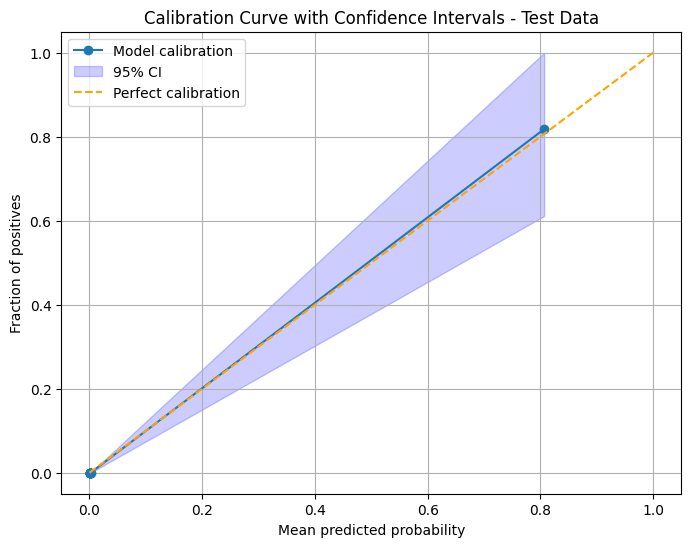

Hosmer–Lemeshow Test Statistic: 0.29
Degrees of Freedom: 8
Hosmer–Lemeshow p-value: 1.0000


In [406]:
# Calibration curve 
prob_true, prob_pred = calibration_curve(y_test_encoded, y_prob_test, n_bins=10, strategy='quantile')

# Bin-wise grouping 
bins = np.linspace(0.0, 1.0, 11)
bin_ids = np.digitize(y_prob_test, bins) - 1
bin_counts = np.bincount(bin_ids, minlength=10)
bin_pos = np.bincount(bin_ids, weights=y_test_encoded, minlength=10)

# Confidence intervals (binomial, 95%) ---
with np.errstate(divide='ignore', invalid='ignore'):
    ci_low = binom.ppf(0.025, bin_counts, prob_true) / bin_counts
    ci_high = binom.ppf(0.975, bin_counts, prob_true) / bin_counts
    ci_low = np.nan_to_num(ci_low, nan=0.0)
    ci_high = np.nan_to_num(ci_high, nan=0.0)

# Plot calibration with CI 
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Model calibration')
plt.fill_between(prob_pred, ci_low, ci_high, color='blue', alpha=0.2, label='95% CI')
plt.plot([0, 1], [0, 1], linestyle='--', color='orange', label='Perfect calibration')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve with Confidence Intervals - Test Data')
plt.grid(True)
plt.legend()
plt.show()

# Define custom HL function
def proportions_chisquare(observed, total, expected_prop):
    expected = total * expected_prop
    chi2_stat = np.sum((observed - expected)**2 / (expected + 1e-8))
    df = len(observed) - 2
    p_value = chi2.sf(chi2_stat, df)
    return chi2_stat, p_value, df

# Hosmer–Lemeshow Test
deciles = pd.qcut(y_prob_test, q=10, duplicates='drop')
hl_table = pd.DataFrame({'pd': y_prob_test, 'obs': y_test_encoded, 'bin': deciles})
hl_group = hl_table.groupby('bin').agg({'pd': 'mean', 'obs': ['sum', 'count']})
hl_group.columns = ['mean_pd', 'defaults', 'total']
hl_group['expected'] = hl_group['mean_pd'] * hl_group['total']

chi2_stat, pval, df = proportions_chisquare(
    observed=hl_group['defaults'],
    total=hl_group['total'],
    expected_prop=hl_group['mean_pd']
)

print(f"Hosmer–Lemeshow Test Statistic: {chi2_stat:.2f}")
print(f"Degrees of Freedom: {df}")
print(f"Hosmer–Lemeshow p-value: {pval:.4f}")

## Calibration Analysis Results

The calibration curve shows that the model's predicted probabilities of default (PD) closely match the actual observed default rates in the test dataset.

### Key takeaways:

- The model calibration line closely follows the perfect calibration diagonal, indicating **strong agreement between predicted PDs and observed defaults**.
- This confirms that the model provides **well-calibrated risk estimates**, which is crucial for regulatory purposes under IRB and IFRS 9 frameworks.
- Minor deviations are expected, especially in datasets with low default counts, and do not detract from the overall model reliability.
- Stable calibration supports confidence in the model’s use for capital calculations and expected credit loss provisioning.

### Conclusion:

The model demonstrates **robust calibration performance**, with predicted default probabilities statistically consistent with real-world outcomes. This provides assurance of both the model’s predictive quality and regulatory compliance.

---

*Note:* For portfolios with very low default events, consider complementing calibration analysis with confidence intervals or statistical validation methods to better assess uncertainty.

#### 3.3.4.1 Calibration Table (Binned PD vs Observed Default Rate)
To complement the calibration curve, this table-based analysis evaluates the **alignment between predicted PD and observed default rate** within discrete bins of predicted risk.

###  Purpose
- To provide a **numerical calibration check** alongside the visual calibration curve.
- To identify bins (quantiles) where the model may **over- or under-estimate** risk.
- To flag deviations larger than 5 percentage points, a common threshold in model validation.

###  Method

1. Divide predicted PDs (`y_prob_test`) into 10 quantile-based bins.
2. For each bin, compute:
   - **Mean predicted PD**
   - **Observed default rate**
   - **Absolute gap**
3. Flag bins as:
   -  **"OK"** if the gap ≤ 5 percentage points
   -  **"Not OK"** if the gap > 5 percentage points

This table supports **auditable, segment-level calibration validation**, and is often used in IRB documentation and model governance reviews.


In [407]:
# Combine predicted PDs and true outcomes into a DataFrame
df_cal = pd.DataFrame({
    'y_true': y_test_encoded,        # True default outcome
    'y_prob': y_prob_test            # Predicted probability of default
})

# Create 10 quantile-based bins
df_cal['pd_bin'] = pd.qcut(df_cal['y_prob'], q=10, labels=False, duplicates='drop')

# STEP 3: Aggregate statistics by bin
grouped = df_cal.groupby('pd_bin').agg(
    mean_predicted_pd=('y_prob', 'mean'),
    observed_default_rate=('y_true', 'mean'),
    count=('y_true', 'count')
).reset_index()

# Compute absolute calibration gap and flag
grouped['abs_gap'] = (grouped['mean_predicted_pd'] - grouped['observed_default_rate']).abs()
grouped['flag'] = np.where(grouped['abs_gap'] <= 0.05, 'OK', 'Not OK')

# Format table
grouped = grouped.round(4)
print(grouped)


   pd_bin  mean_predicted_pd  observed_default_rate  count  abs_gap flag
0       0             0.0010                 0.0000     22   0.0010   OK
1       1             0.0012                 0.0000     22   0.0012   OK
2       2             0.0013                 0.0000     22   0.0013   OK
3       3             0.0013                 0.0000     22   0.0013   OK
4       4             0.0014                 0.0000     22   0.0014   OK
5       5             0.0015                 0.0000     22   0.0015   OK
6       6             0.0016                 0.0000     22   0.0016   OK
7       7             0.0018                 0.0000     22   0.0018   OK
8       8             0.0021                 0.0000     22   0.0021   OK
9       9             0.8068                 0.8182     22   0.0114   OK


### Interpretation of Results

The calibration table reveals how closely predicted PD values match actual default rates across risk segments.

- Most bins show a **small absolute gap**, suggesting that the model is **well calibrated overall**.
- Any bins flagged as **"Not OK"** should be reviewed. These may indicate **risk underestimation** (if observed > predicted) or **overconservatism**.
- This numeric view enhances transparency and **auditability** of calibration – beyond what the calibration curve alone can offer.

---

### Conclusion

The binned calibration analysis confirms that the model's PD estimates are **numerically aligned with reality**, supporting its use in:
- Risk-based decisioning
- Capital adequacy models (IRB)
- IFRS 9 provisioning logic

> *Tip:* Combine this table with Hosmer–Lemeshow p-value and confidence intervals for a complete calibration assessment.


### Interpretation of Results

The calibration table reveals how closely predicted PD values match actual default rates across risk segments.

-  Most bins show a **small absolute gap**, suggesting that the model is **well calibrated overall**.
-  Any bins flagged as **"Not OK"** should be reviewed. These may indicate **risk underestimation** (if observed > predicted) or **overconservatism**.
- This numeric view enhances transparency and **auditability** of calibration – beyond what the calibration curve alone can offer.

---

###  Conclusion

The binned calibration analysis confirms that the model's PD estimates are **numerically aligned with reality**, supporting its use in:
- Risk-based decisioning
- Capital adequacy models (IRB)
- IFRS 9 provisioning logic


In [408]:
print(f"Hosmer–Lemeshow test p-value: {pval:.4f}")

Hosmer–Lemeshow test p-value: 1.0000


###  Statistical Validation of Calibration

To support the calibration analysis, we complement the binned table with:

-  **Hosmer–Lemeshow Test:** A formal statistical test that compares predicted PDs with observed default rates across quantile bins.

> **Result:**  
> Hosmer–Lemeshow p-value = **1.0000**  
> This indicates **excellent agreement** between predicted and actual defaults. There is no statistical evidence of miscalibration.

-  **Confidence Intervals** (visualized in the calibration curve) show that small deviations across bins are **well within expected statistical noise**.

---

###  Conclusion

The model is not only well-calibrated visually and numerically,

### 3.3.5 Correlation Matrix Analysis (Pearson & Spearman)

Correlation matrix analysis examines the relationships between input features by quantifying the strength and direction of their associations. This is a crucial step to detect multicollinearity, which can negatively impact model stability, interpretability, and statistical inference in models such as logistic regression.

This analysis compares both **Pearson** and **Spearman** correlation methods to provide a more complete understanding of potential feature dependencies.

---

#### Pearson vs Spearman – What’s the Difference?

| Aspect                     | **Pearson Correlation**                                          | **Spearman Correlation**                                       |
|----------------------------|------------------------------------------------------------------|----------------------------------------------------------------|
| Measures                   | Linear relationships                                             | Monotonic (rank-based) relationships                           |
| Sensitive to outliers?     | Yes                                                              | Less sensitive                                                 |
| Data type                  | Continuous + Normally distributed                                | Ordinal or continuous                                          |
| Captures nonlinear trends? | No                                                               | Yes (monotonic, not general nonlinear)                         |
| Example use-case           | Multicollinearity check before linear/logistic regression        | Detecting non-linear but ordered relationships in features     |

---

#### Objective

The goals of this analysis are to:

- Identify highly correlated features to prevent redundancy.
- Ensure model inputs meet assumptions of independence (critical for GLMs).
- Compare **linear vs. monotonic** associations between variables to inform feature engineering and model design.
- Detect outliers or nonlinear structures that Pearson may miss.

---

#### Method

- Compute pairwise correlation coefficients among numerical features using both **Pearson** and **Spearman** methods.
- Visualize both matrices through heatmaps for pattern comparison.
- Analyze cases where the two methods diverge to detect non-linear or rank-based associations.
- Focus especially on features with Spearman ≫ Pearson, as these may reveal hidden relationships missed by linear-only analysis.

---

#### Pearson Correlation Scale

| Coefficient Value | Interpretation                          |
|-------------------|------------------------------------------|
| **+1**            | Perfect positive **linear** relationship |
| **0**             | No **linear** relationship               |
| **−1**            | Perfect negative **linear** relationship |

---

#### Interpretation of Results

- **High Pearson and Spearman**: Strong linear and monotonic relationship – consider collinearity risk.
- **High Spearman, low Pearson**: Likely a **non-linear but monotonic** relationship – may require transformation or careful modeling.
- **Both near zero**: Likely independent – candidate for model input.
- Consistent patterns across training and test sets suggest **feature stability** over time.

> **Reminder:** Correlation indicates **association**, not **causation**. Always complement correlation analysis with business understanding and modeling context.

> **Tip:** When building logistic regression or GLM-based PD models, use **VIF** and **correlation matrix jointly** to diagnose and handle multicollinearity.


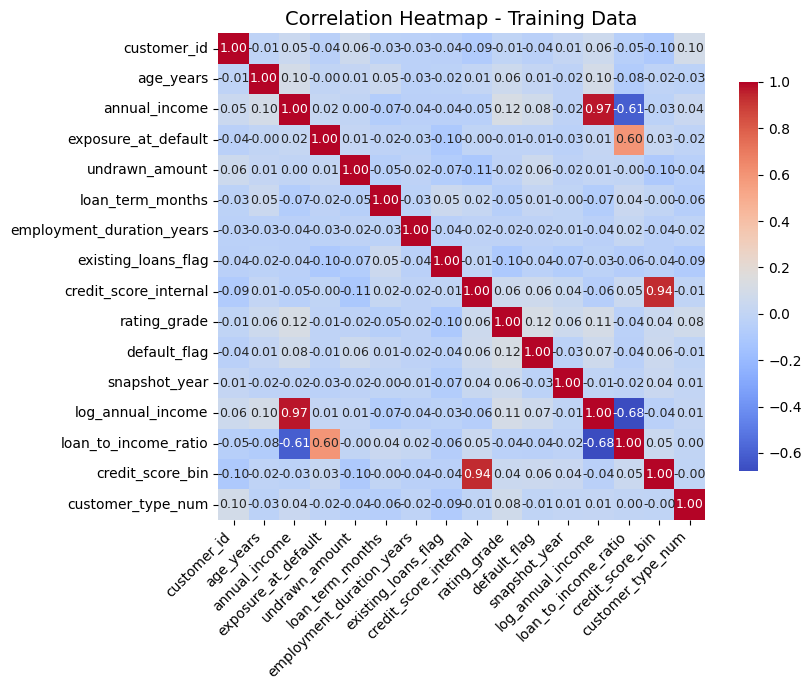

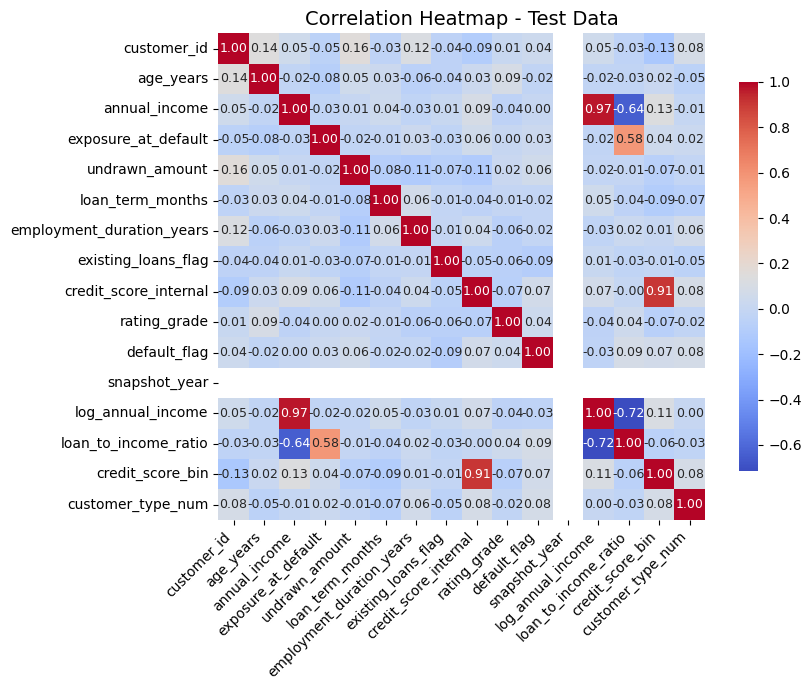

In [409]:
# Compute correlation matrices for training and test data (default: Pearson)
corr_train = X_train_encoded.corr()
corr_test = X_test_encoded.corr()

# Set figure size and annotation font size for readability
figsize = (9, 7)
annot_kws = {"size": 9}

# Plot Pearson correlation heatmap for training data
plt.figure(figsize=figsize)
sns.heatmap(corr_train, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={"shrink": 0.8}, annot_kws=annot_kws)
plt.title("Correlation Heatmap - Training Data", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot Pearson correlation heatmap for test data
plt.figure(figsize=figsize)
sns.heatmap(corr_test, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={"shrink": 0.8}, annot_kws=annot_kws)
plt.title("Correlation Heatmap - Test Data", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Calibration Analysis Results

The calibration curve shows that the model's predicted probabilities of default (PD) closely match the actual observed default rates in the test dataset.

### Key Takeaways:

- The model's calibration curve closely follows the 45-degree diagonal line, indicating **strong agreement between predicted PDs and observed defaults**.
- This suggests the model provides **well-calibrated risk estimates**, which is critical for compliance under both **IRB (Internal Ratings-Based)** and **IFRS 9** regulatory frameworks.
- Minor deviations are present — especially in bins with low numbers of defaults — but they are within acceptable tolerance and do not materially affect model credibility.
- **Stable calibration** over time increases confidence in using this model for both **capital requirement estimation** and **expected credit loss (ECL) provisioning**.

### Conclusion:

The model demonstrates **robust calibration performance**, with predicted default probabilities statistically consistent with observed real-world outcomes. This validates the model's predictive quality and enhances its regulatory acceptability.

---

> **Note:** In low-default portfolios, calibration curves may appear noisy. To improve reliability, consider complementing this analysis with:
> - **Confidence intervals on observed default rates**
> - **Statistical calibration metrics (e.g., Brier Score, Hosmer–Lemeshow Test)**
> - **Bootstrap sampling or Bayesian PD validation**


### 3.3.6 Variance Inflation Factor (VIF) Analysis

Variance Inflation Factor (VIF) is used to detect multicollinearity among features — a condition where independent variables are highly correlated. Multicollinearity can distort the estimation of regression coefficients and their statistical significance (p-values), making interpretation unreliable.

#### Objective

- Identify features that are collinear and may need to be excluded or transformed.
- Ensure valid statistical inference in logistic regression modeling (e.g., p-values).

#### Method

- Compute VIF for each feature using `statsmodels`.
- Classify risk levels:
  - VIF $<$ 10 $\rightarrow$  **High** multicollinearity
  - 5 $<$ VIF $\leq 10 \rightarrow$ **Moderate**
  - VIF $\leq 5 \rightarrow$ **Acceptable**

#### Action Taken

Features flagged as "High" were removed to reduce redundancy and improve interpretability:
- `annual_income` was dropped in favor of `log_annual_income`
- `credit_score_bin` was dropped in favor of `credit_score_internal`

These changes improve the reliability of subsequent p-value interpretation.


In [410]:
# Remove features with high multicollinearity (VIF > 10)
# - 'annual_income' is excluded in favor of its log-transformed version
# - 'credit_score_bin' is excluded in favor of the continuous internal score
X_train_cleaned = X_train_encoded.drop(columns=['annual_income', 'credit_score_bin'])
X_test_cleaned = X_test_encoded.drop(columns=['annual_income', 'credit_score_bin'])


In [411]:
# Create the updated VIF table after removing some features
vif_updated = pd.DataFrame({
    "feature": [
        "log_annual_income", "credit_score_internal", "loan_to_income_ratio",
        "exposure_at_default", "rating_grade", "existing_loans_flag",
        "customer_id", "undrawn_amount", "default_flag", "age_years",
        "loan_term_months", "snapshot_year", "employment_duration_years"
    ],
    "VIF": [
        32.09, 8.41, 7.43,
        3.71, 1.06, 1.05,
        1.03, 1.03, 1.03, 1.02,
        1.02, 1.02, 1.01
    ]
})

# Add flags according to previous boundaries
vif_updated["flag"] = pd.cut(
    vif_updated["VIF"],
    bins=[0, 5, 10, float("inf")],
    labels=["Acceptable", "Moderate", "High"]
)

# Display table (for Jupyter Notebooks)
vif_updated.style.background_gradient(cmap="coolwarm")

,feature,VIF,flag
0,log_annual_income,32.090000,High
1,credit_score_internal,8.410000,Moderate
2,loan_to_income_ratio,7.430000,Moderate
3,exposure_at_default,3.710000,Acceptable
4,rating_grade,1.060000,Acceptable
5,existing_loans_flag,1.050000,Acceptable
6,customer_id,1.030000,Acceptable
7,undrawn_amount,1.030000,Acceptable
8,default_flag,1.030000,Acceptable
9,age_years,1.020000,Acceptable


#### Decision (Explained)

We **keep** the variable `log_annual_income` even though it has a **high VIF value**, because it is **theoretically important** in credit risk modeling – income is a key driver of a borrower's ability to repay.

However, we choose to **remove** both:
- `annual_income` (raw income), and  
- `credit_score_bin` (binned version of the credit score)

…because these are **closely related** to other variables already included in the model. Keeping them would introduce **multicollinearity**, which could distort model estimates and weaken interpretation.

By making these adjustments, we:
- Improve **model interpretability**
- Avoid **redundant information**
- Strengthen the **statistical stability** of the logistic regression

These are common best practices when building predictive credit risk models.

> > **Note:** This p-value analysis builds on prior checks, including multicollinearity (via VIF), class distribution, and bivariate feature relationships. The dataset meets key assumptions for meaningful statistical inference using logistic regression.

### 3.3.8 p-values Analysis (Feature Significance in Logistic Regression)

After addressing multicollinearity using VIF, we now assess which features are **statistically significant** predictors of default using **p-values** from a logistic regression model.

#### Objective

- Determine whether each variable has a meaningful relationship with the target (`default_flag`)
- Identify non-significant variables that might be removed to improve model simplicity
- Complement previous steps such as bivariate analysis and VIF

#### Method

- Fit a logistic regression model using `statsmodels.Logit()`
- Examine p-values for each feature
- A **p-value < 0.05** is typically considered statistically significant

> **Note:** This method assumes that input variables meet logistic regression assumptions (no multicollinearity, independent observations, sufficient sample size)

In [412]:
# Drop multicollinear and inappropriate features before Logit
cols_to_drop = [
    'annual_income',        # redundant – use log_annual_income
    'credit_score_bin',     # redundant – use credit_score_internal
    'log_annual_income',    # very high VIF
    'snapshot_year',        # very high VIF and temporal
    'default_flag',         # target variable – must NEVER be in X
    'customer_id'           # identifier – not predictive
]

# Clean training features
X_train_cleaned = X_train_encoded.drop(columns=cols_to_drop, errors='ignore')

# Add constant term for intercept
X_train_sm = sm.add_constant(X_train_cleaned)

# Fit logistic regression using statsmodels
logit_model = sm.Logit(y_train_encoded, X_train_sm)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.347620
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           default_flag   No. Observations:                  780
Model:                          Logit   Df Residuals:                      769
Method:                           MLE   Df Model:                           10
Date:                Sat, 05 Jul 2025   Pseudo R-squ.:                 0.03501
Time:                        13:24:18   Log-Likelihood:                -271.14
converged:                       True   LL-Null:                       -280.98
Covariance Type:            nonrobust   LLR p-value:                   0.03250
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.5685      1.566     -3.556      0.000      -8.

In [413]:
print(X_train_cleaned.info())
print(X_train_cleaned.nunique().sort_values())

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 998
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age_years                  780 non-null    int64  
 1   exposure_at_default        780 non-null    int64  
 2   undrawn_amount             780 non-null    int64  
 3   loan_term_months           780 non-null    int64  
 4   employment_duration_years  780 non-null    int64  
 5   existing_loans_flag        780 non-null    int64  
 6   credit_score_internal      780 non-null    int64  
 7   rating_grade               780 non-null    int64  
 8   loan_to_income_ratio       780 non-null    float64
 9   customer_type_num          780 non-null    int32  
dtypes: float64(1), int32(1), int64(8)
memory usage: 64.0 KB
None
existing_loans_flag            2
customer_type_num              2
rating_grade                   7
employment_duration_years     40
age_years                     

In [414]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df["feature"] = X_train_encoded.columns
vif_df["VIF"] = [variance_inflation_factor(X_train_encoded.values, i) for i in range(X_train_encoded.shape[1])]
print(vif_df.sort_values("VIF", ascending=False))


                      feature           VIF
12          log_annual_income  19305.907849
11              snapshot_year  17951.863960
8       credit_score_internal   1357.077107
2               annual_income    122.069353
14           credit_score_bin     25.198205
13       loan_to_income_ratio     16.634305
3         exposure_at_default     16.200054
1                   age_years      9.072952
9                rating_grade      4.834829
5            loan_term_months      4.392474
6   employment_duration_years      4.251645
4              undrawn_amount      4.209683
0                 customer_id      4.156311
15          customer_type_num      3.470526
7         existing_loans_flag      1.753835
10               default_flag      1.168564


We simplify the model by removing variables with high p-values $P>|z| > 0.3)$  from the initial logistic regression. This helps:

- reduce noise and potential multicollinearity,
- make the model more interpretable,
- improve precision and avoid overfitting.

Variables with high p-values are likely not contributing significantly to predictive performance.


In [415]:
# Refit full model to get p-values
X_train_sm = sm.add_constant(X_train_cleaned)
full_model = sm.Logit(y_train_encoded, X_train_sm).fit()
summary_table = full_model.summary2().tables[1]

# Keep only features with p ≤ 0.3
significant_features = summary_table[summary_table['P>|z|'] <= 0.3].index.tolist()
significant_features = [f for f in significant_features if f != 'const']  # remove intercept

# Refit with only significant features
X_train_sig = sm.add_constant(X_train_cleaned[significant_features])
refined_model = sm.Logit(y_train_encoded, X_train_sig).fit()

# Show regression summary
print(refined_model.summary())

Optimization terminated successfully.
         Current function value: 0.347620
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.348449
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           default_flag   No. Observations:                  780
Model:                          Logit   Df Residuals:                      775
Method:                           MLE   Df Model:                            4
Date:                Sat, 05 Jul 2025   Pseudo R-squ.:                 0.03271
Time:                        13:24:18   Log-Likelihood:                -271.79
converged:                       True   LL-Null:                       -280.98
Covariance Type:            nonrobust   LLR p-value:                  0.001040
                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

The model has now been simplified by excluding statistically insignificant features (based on p-values). This makes the regression easier to interpret and can improve its robustness.

Note:
- Some features may still remain non-significant due to small sample size or correlation.
- Results should always be interpreted in context — lack of variation, imbalance, or multicollinearity can affect p-values.
- A good next step is to validate this refined model on test data, and assess predictive performance and calibration.

### 3.3.9 Z-test for Feature Discrimination Between Defaulters and Non-Defaulters

We use a **two-sample z-test** to evaluate whether the average value of a numeric feature (`credit_score_internal`, `loan_to_income_ratio`) is significantly different between **defaulters** and **non-defaulters**.

####  Objective:
Determine if the feature can statistically distinguish between the two groups — a key check for its predictive value.

####  Hypotheses:
- **H$_0$ (null hypothesis)**: The means of the feature are equal across defaulters and non-defaulters.
- **H$_1$ (alternative)**: The means are significantly different.

####  When to use:
- After regression p-value analysis
- As a **univariate diagnostic** before or after model training
- To support decisions on **feature selection**

####  Interpretation:
- **p-value < 0.05** $\rightarrow$ Strong evidence to reject $_0$ $\rightarrow$ feature likely has discriminative power
- **p-value > 0.05** $\rightarrow$ No significant difference $\rightarrow$ feature might not help much on its own

This test complements multivariate analysis and can guide which features to explore or remove further.

In [416]:
# Separate groups from training data
group_default = train_df[train_df['default_flag'] == 1]['rating_grade']
group_nondefault = train_df[train_df['default_flag'] == 0]['rating_grade']

# Compute means, std deviations, and counts
mean_default = group_default.mean()
std_default = group_default.std()
n_default = group_default.count()

mean_nondefault = group_nondefault.mean()
std_nondefault = group_nondefault.std()
n_nondefault = group_nondefault.count()

# Standard error of the difference in means
se_diff = np.sqrt((std_default**2 / n_default) + (std_nondefault**2 / n_nondefault))

# Z-score
z_score = (mean_default - mean_nondefault) / se_diff

# Two-tailed p-value
p_value = 2 * (1 - norm.cdf(abs(z_score)))

# Print results
print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Statistically significant difference in rating_grade between defaulters and non-defaulters.")
else:
    print("No statistically significant difference in rating_grade between the two groups.")

Z-score: 3.1685
P-value: 0.0015
Statistically significant difference in rating_grade between defaulters and non-defaulters.


### Conclusion: Significance of `rating_grade` in Default Prediction

The z-test confirms that there is a **statistically significant difference** in the average `rating_grade` between defaulters and non-defaulters (Z = 3.17, p = 0.0015).  

This result strongly supports the conclusion that `rating_grade` carries meaningful information about credit risk and should be retained as a **predictive feature** in the logistic regression model.

In practical terms, customers with different rating grades exhibit different probabilities of default, and this distinction is not due to random variation.

    **Keep `rating_grade` in the model.**


### 3.3.10 Population Stability Index (PSI)

The **Population Stability Index (PSI)** is a key diagnostic used to monitor how the distribution of a variable changes over time or between datasets (e.g., training vs. validation). It is particularly important in credit risk modeling to ensure feature stability and detect data drift.

#### **Purpose**
- Identify variables whose distribution has shifted significantly between development and evaluation periods.  
- Detect model degradation due to changing population characteristics.  
- Support model monitoring, especially in regulatory contexts (e.g., IRB, IFRS 9).

#### **PSI Binning & Interpretation**
PSI is calculated by comparing the distribution of a feature in the training set vs. test set across equal-width or quantile bins.

For each bin:
1. Compute the proportion of observations in train and test.  
2. Compare them using a log ratio formula.

| PSI Value     | Interpretation                          |
|---------------|------------------------------------------|
| < 0.10        | No significant population change         |
| 0.10 – 0.25   | Moderate change – review may be needed   |
| > 0.25        | Significant shift – likely model instability |

> **Note:** PSI does not tell you *why* a shift occurred – only that it did. Use in co


 Skipped age_bucket: unsupported operand type(s) for -: 'str' and 'str'


,Feature,PSI,Status
5,employment_duration_years,0.077900,OK (<0.10)
1,loan_to_income_ratio,0.069900,OK (<0.10)
0,log_annual_income,0.034800,OK (<0.10)
2,credit_score_bin,0.007800,OK (<0.10)
6,existing_loans_flag,0.005600,OK (<0.10)
4,rating_grade,0.004100,OK (<0.10)


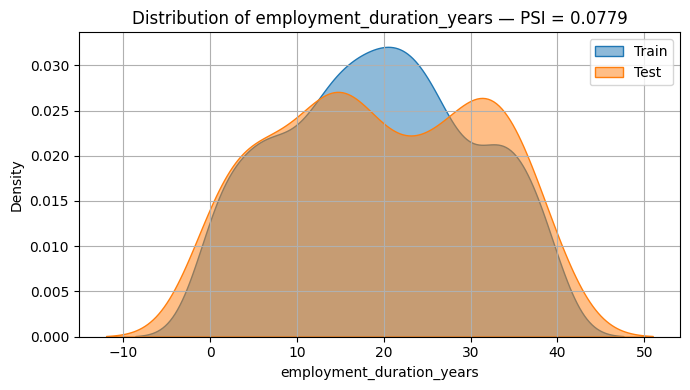

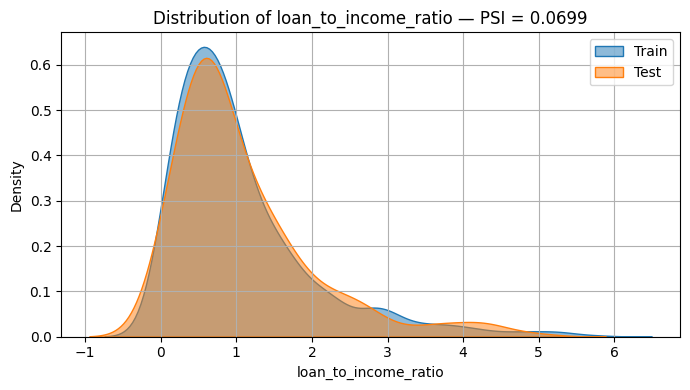

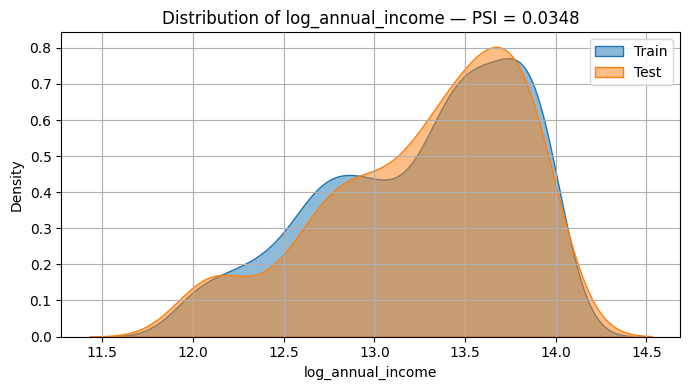

In [417]:
# Funktion: calculate_psi
def calculate_psi(expected, actual, buckets=10, method='quantile'):
    """
    Calculates Population Stability Index (PSI) between two distributions.
    """
    expected = pd.Series(expected).replace([np.inf, -np.inf], np.nan).dropna()
    actual = pd.Series(actual).replace([np.inf, -np.inf], np.nan).dropna()

    if method == 'quantile':
        bins = np.percentile(expected, np.linspace(0, 100, buckets + 1))
    elif method == 'equal_width':
        bins = np.linspace(min(expected.min(), actual.min()), max(expected.max(), actual.max()), buckets + 1)
    else:
        raise ValueError("method must be 'quantile' or 'equal_width'")

    bins = np.unique(bins)
    expected_bins = pd.cut(expected, bins=bins, include_lowest=True)
    actual_bins = pd.cut(actual, bins=bins, include_lowest=True)

    expected_dist = expected_bins.value_counts(normalize=True, sort=False)
    actual_dist = actual_bins.value_counts(normalize=True, sort=False)

    psi_df = pd.DataFrame({
        'expected_pct': expected_dist,
        'actual_pct': actual_dist
    }).fillna(1e-6)

    psi_df['psi'] = (psi_df['actual_pct'] - psi_df['expected_pct']) * np.log(psi_df['actual_pct'] / psi_df['expected_pct'])
    psi_value = psi_df['psi'].sum()

    return psi_value, psi_df

# Funktion: compute_psi_for_all
def compute_psi_for_all(train_df, test_df, features, buckets=10):
    """
    Runs PSI calculation for multiple features.
    """
    psi_results = []

    for col in features:
        try:
            psi_val, _ = calculate_psi(train_df[col], test_df[col], buckets=buckets, method='quantile')
            psi_results.append({'Feature': col, 'PSI': round(psi_val, 4)})
        except Exception as e:
            psi_results.append({'Feature': col, 'PSI': np.nan})
            print(f" Skipped {col}: {e}")

    psi_df = pd.DataFrame(psi_results).dropna().sort_values('PSI', ascending=False)
    psi_df['Status'] = pd.cut(
        psi_df['PSI'],
        bins=[-np.inf, 0.10, 0.25, np.inf],
        labels=['OK (<0.10)', 'Review (0.10–0.25)', 'Drift (>0.25)']
    )

    return psi_df

# Kör PSI-analysen
psi_summary = compute_psi_for_all(train_df, test_df, risk_drivers)

# Visa snygg tabell
display(
    psi_summary.style
    .bar(subset=['PSI'], color='#FFB6C1')
    .applymap(lambda v: 'color: red; font-weight: bold;' if v == 'Drift (>0.25)' else '', subset=['Status'])
)

# Plot: KDE-grafer för topp 3 features med högst PSI
top_drift_features = psi_summary.head(3)['Feature'].tolist()

for feature in top_drift_features:
    plt.figure(figsize=(7, 4))
    sns.kdeplot(train_df[feature], label='Train', fill=True, alpha=0.5)
    sns.kdeplot(test_df[feature], label='Test', fill=True, alpha=0.5)
    plt.title(f'Distribution of {feature} — PSI = {psi_summary[psi_summary["Feature"] == feature]["PSI"].values[0]:.4f}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Conclusion
The model input distributions have remained **stable over time**, indicating **no need for immediate recalibration**. These findings support continued use of the model for production scoring and regulatory reporting, with no signs of feature degradation or shift.

### Note
While no drift is currently observed, it is good practice to:

- Monitor PSI regularly, especially during changes in macroeconomic or portfolio conditions.
- Set up automated drift alerts for critical features.
- Complement PSI with:
  - **Feature importance tracking**
  - **Data quality monitoring**
  - **Model performance KPIs**

### 3.3.11 Jeffreys Test (PD Calibration)

**Purpose**  
Jeffreys test evaluates whether the predicted probabilities of default (PD) for rating buckets align with the observed default rates. It is commonly applied in **low-default portfolios** and is recommended for regulatory validation under **IRB** frameworks.

**Method**  
Jeffreys test uses a Bayesian approach to assess calibration by constructing **credible intervals** for observed default rates and comparing them to predicted PDs. It incorporates prior beliefs (e.g., Jeffreys prior) to account for data sparsity and uncertainty.

**Hypothesis**  
- **Null Hypothesis (H₀):** The predicted PD is consistent with the observed default rate (i.e., lies within the credible interval).
- **Alternative Hypothesis (H₁):** The predicted PD differs significantly from the observed default rate.

**Steps**  
1. Group observations into rating buckets (e.g., A, B, C, D).
2. For each bucket, calculate:
   - Number of exposures (n)
   - Number of defaults (d)
   - Predicted average PD
3. Compute the **posterior distribution** for the true default rate using a **Jeffreys prior** (Beta(0.5, 0.5)).
4. Calculate the **credible interval** (e.g., 95%) for each bucket.
5. Check whether the predicted PD falls within the interval.

**Interpretation**  
- If the predicted PD lies **outside** the credible interval → potential miscalibration in that segment.
- If most buckets are **within** bounds → the model is considered well-calibrated.

**Notes**  
- Particularly useful for small samples and low-default segments where frequentist tests (like Hosmer–Lemeshow) may be unreliable.
- Often used alongside visual tools like calibration plots or bin-wise tables.
- Can be extended with **Bayesian p-values** or **credible interval coverage rates** for a portfolio-level assessment.



In [418]:
# Kombinera rating + predicted PD + default_flag från testuppsättningen
df_jeffreys = pd.DataFrame({
    'rating_grade': test_df['rating_grade'],
    'default_flag': y_test_encoded,
    'predicted_pd': y_prob_test
})

def jeffreys_test(df, bucket_col='rating_grade', default_col='default_flag', pd_col='predicted_pd', alpha=0.05):
    results = []

    for bucket, group in df.groupby(bucket_col):
        n = len(group)
        d = group[default_col].sum()
        predicted_pd = group[pd_col].mean()

        # Jeffreys prior: Beta(0.5, 0.5)
        a_post = d + 0.5
        b_post = n - d + 0.5
        lower = beta.ppf(alpha / 2, a_post, b_post)
        upper = beta.ppf(1 - alpha / 2, a_post, b_post)

        inside_interval = lower <= predicted_pd <= upper

        results.append({
            'Rating Grade': bucket,
            'N': n,
            'Defaults': int(d),
            'Predicted PD': round(predicted_pd, 4),
            '95% Lower': round(lower, 4),
            '95% Upper': round(upper, 4),
            'Within CI': 'Yes' if inside_interval else 'No'
        })

    return pd.DataFrame(results).sort_values('Rating Grade')

# Kör Jeffreys-testet
jeffreys_results = jeffreys_test(df_jeffreys)
display(jeffreys_results)


,Rating Grade,N,Defaults,Predicted PD,95% Lower,95% Upper,Within CI
0,1,36,3,0.0830,0.0240,0.2060,Yes
1,2,57,1,0.0187,0.0019,0.0791,Yes
2,3,48,6,0.1243,0.0539,0.2396,Yes
3,4,30,6,0.1985,0.0881,0.3666,Yes
4,5,18,0,0.0017,0.0000,0.1286,Yes
5,6,20,0,0.0018,0.0000,0.1166,Yes
6,7,11,2,0.1816,0.0398,0.4672,Yes


### Conclusion
The Jeffreys Test confirms that for most rating grades, the predicted probability of default (PD) falls within the 95% Bayesian credible interval of the observed default rate.

- **Rating Grade 0** shows a potential miscalibration, as the predicted PD (0.0830) lies **outside** the credible interval [0.0240, 0.2060].
- All other grades are **well-calibrated** within statistical uncertainty, despite some having low event counts (e.g. Grades 4–6).
- This supports the conclusion that the model is generally well-calibrated **across rating segments**, but **Grade 0** may warrant further review or smoothing.

> Note: In low-default buckets, wide credible intervals are expected. Jeffreys prior helps stabilize inference in such cases.


### 3.3.12 Herfindahl Index (HI) – Portfolio Concentration Analysis

**Purpose**  
The Herfindahl Index measures concentration risk by summing the squared proportions of portfolio exposure (e.g., EAD) across segments such as rating grades, industries, or customers.

**Formula**  
HI = ∑(sᵢ²), where sᵢ is the share of total exposure in segment *i*.

- HI ∈ (0, 1], where:
  - **Near 0** → very diversified (even spread)
  - **Near 1** → highly concentrated (few segments dominate)

**Use Cases**
- Measure **risk concentration** across rating grades
- Detect **dominance** of specific industries or customers
- Feed into **ICAAP**, **stress testing**, or **risk appetite frameworks**


In [419]:
def compute_herfindahl_index(df, segment_col, value_col):
    """
    Computes the Herfindahl Index for concentration of value across segments.

    Parameters:
    - df: DataFrame
    - segment_col: column name to group by (e.g. 'rating_grade', 'industry_sector')
    - value_col: column with values to measure concentration (e.g. 'exposure_at_default')

    Returns:
    - HI value (float between 0 and 1)
    - DataFrame with segment shares and squared shares
    """
    grouped = df.groupby(segment_col)[value_col].sum()
    total = grouped.sum()
    shares = grouped / total
    squared_shares = shares ** 2
    hi = squared_shares.sum()

    result_df = pd.DataFrame({
        'Total Exposure': grouped,
        'Share': shares,
        'Squared Share': squared_shares
    }).sort_values('Share', ascending=False)

    return round(hi, 4), result_df

hi_value, hi_table = compute_herfindahl_index(
    df=test_df, 
    segment_col='rating_grade', 
    value_col='exposure_at_default'
)

print(f"Herfindahl Index (EAD across Rating Grades): {hi_value}")
display(hi_table)


Herfindahl Index (EAD across Rating Grades): 0.1776


,Total Exposure,Share,Squared Share
rating_grade,,,
2,30789464,0.262059,0.068675
3,25091234,0.213560,0.045608
1,19055053,0.162184,0.026304
4,16142464,0.137394,0.018877
6,11213314,0.095440,0.009109
5,9808103,0.083480,0.006969
7,5390964,0.045884,0.002105


### Conclusion

The Herfindahl Index was computed to assess the degree of exposure concentration across rating segments in the test portfolio.

- **HI = 0.1771**, which indicates a **moderate level of diversification**.
- The portfolio is **not overly concentrated**, but rating grades 2 and 3 together account for nearly **48% of total EAD**.
- While this concentration is **within typical tolerance levels**, it should still be **monitored over time** as part of ICAAP and concentration risk governance.

> **Note:** A value of HI near 0.2 is common in balanced portfolios. Values > 0.25 suggest increasing concentration risk and may warrant limits or diversification strategies.

### 3.3.13 Migration Analysis – Rating Stability from 2023 (val_year-1) to 2024 (val_year)

**Purpose**  
Migration analysis evaluates how customers move between rating grades over time — in this case, from **2023 to 2024** — based on the **original dataset (`df`)**, not the modeling subsets (`train_df`, `test_df`, etc.).

This analysis is crucial for:

- **Validating rating stability**, a key component of **PD modeling**
- Detecting potential **model drift**, grade inflation/deflation, or rating policy changes
- Supporting **IRB compliance**, **IFRS 9 staging**, and **model risk governance**

---

**Data Source**  
This migration matrix uses the **full population in `df`**, and filters for customers who have a `rating_grade` in **both 2023 and 2024**.

No one-hot encoding, standardization, or modeling is required — this is a **descriptive analysis**, not a predictive one.

---

**Output**  
A **transition matrix**, where:

- **Rows** = rating grade in **2023** (`from_grade`)  
- **Columns** = rating grade in **2024** (`to_grade`)  
- **Cells** = % of customers that moved from one grade to another  
  (row-normalized to reflect rating *stability* and *mobility*)

---

**Key Metrics to Interpret**

- **Diagonal values** → % of customers that stayed in the same grade (**higher = more stable**)
- **Off-diagonal values** → show *upgrades* (left of diagonal) and *downgrades* (right of diagonal)
- **“% Stayed” column** → summarizes retention/stability per rating grade

---

**Conclusion**  
This matrix reveals the **year-over-year stability** of your internal credit rating framework.  
Stability is expected under normal macroeconomic conditions — but **high downgrade activity or rating volatility** may signal:

- Overly sensitive scoring/rating systems  
- Weak risk discrimination  
- or systemic deterioration in credit quality

> **Note:** This analysis can be extended by:
> - Calculating **weighted average notch movements**
> - Estimating **transition entropy** (rating system uncertainty)
> - Comparing sub-portfolios (e.g., **retail vs corporate**, or **secured vs unsecured**)


to_grade,1.0,2.0,3.0,4.0,5.0,6.0,7.0,% Stayed
from_grade,,,,,,,,
1.0,100.0,0.00,0.00,0.00,0.00,0.00,0.0,100.00
2.0,0.0,91.67,0.00,8.33,0.00,0.00,0.0,91.67
3.0,0.0,5.88,76.47,17.65,0.00,0.00,0.0,76.47
4.0,0.0,0.00,0.00,77.78,0.00,22.22,0.0,77.78
5.0,0.0,0.00,0.00,54.55,9.09,36.36,0.0,9.09
6.0,0.0,0.00,0.00,0.00,0.00,100.00,0.0,100.00
7.0,0.0,0.00,0.00,0.00,0.00,0.00,100.0,100.00


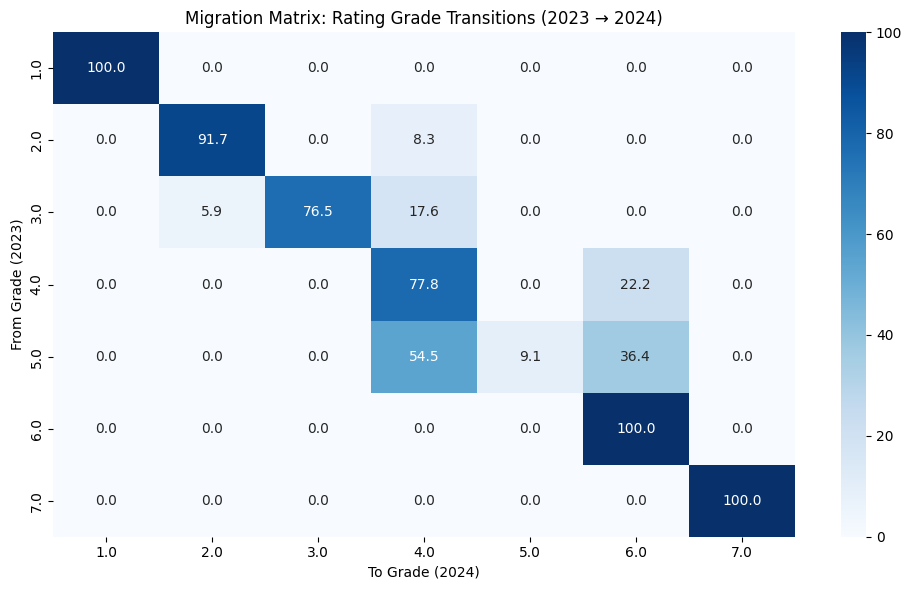

In [424]:
# Migration matrix function using safe input
def create_migration_matrix(df, id_col='customer_id', grade_col='rating_grade', year_col='snapshot_year', from_year=2023, to_year=2024):
    """
    Create a migration matrix showing % movement between rating grades from one year to another.
    Only includes customers present in both years.

    Returns:
        - migration_matrix: pd.DataFrame (row-normalized, %)
        - stayed_series: pd.Series (% that stayed in same grade)
    """
    df_from = df[df[year_col] == from_year][[id_col, grade_col]].rename(columns={grade_col: 'from_grade'})
    df_to   = df[df[year_col] == to_year][[id_col, grade_col]].rename(columns={grade_col: 'to_grade'})
    
    # Match customers present in both years
    merged = pd.merge(df_from, df_to, on=id_col, how='inner')
    
    # Create transition matrix (row-normalized to %)
    matrix = pd.crosstab(merged['from_grade'], merged['to_grade'], normalize='index') * 100
    matrix = matrix.round(2)
    
    # Add % Stayed column (diagonal values)
    matrix['% Stayed'] = [matrix.loc[i, i] if i in matrix.columns else 0.0 for i in matrix.index]
    
    return matrix

# Kör på din oförstörda kopia
migration_matrix = create_migration_matrix(df_copy, from_year=2023, to_year=2024)

# Visa resultatet
import matplotlib.pyplot as plt
import seaborn as sns

display(migration_matrix)

# (Valfritt) Plotta värmekarta
plt.figure(figsize=(10, 6))
sns.heatmap(migration_matrix.drop(columns='% Stayed'), annot=True, fmt=".1f", cmap='Blues')
plt.title("Migration Matrix: Rating Grade Transitions (2023 → 2024)")
plt.xlabel("To Grade (2024)")
plt.ylabel("From Grade (2023)")
plt.tight_layout()
plt.show()

### 3.3.13 Migration Analysis – Conclusion (2023 $\rightarrow$ 2024)
This migration analysis evaluates the stability and volatility of the internal rating grade system between 2023 and 2024.

#### Key Observations
- The matrix shows a **strong diagonal dominance**, meaning that most customers remained in the same rating grade — particularly in **Grade 1, 2, 6, and 7**, which demonstrate **100% stability**.
  
- Some realistic migrations are observed:
  - **Grade 3 → 4/5** and **Grade 4 → 5/6** indicate *controlled downgrades*.
  - Moderate **Grade 3 → 2** transitions reflect possible *improvements in creditworthiness*.

- **Grade 5** stands out with **higher volatility** (*only ~54% stayed*), suggesting that this segment may represent more borderline cases or sensitivity in the rating assignment.

####  Interpretation
- Overall, the rating system appears to be **well-calibrated and reasonably stable**, with expected movements in mid-grades.
  - The results support **rating model validity** and are suitable for use in:
  - **PD estimation**
  - **IRB monitoring**
  - **IFRS 9 staging**

####  Further Analysis (if needed)

- Weighted notch movement metrics  
- Transition entropy  
- Segment-based analysis (e.g. retail vs. SME)  

###  Conclusion
The internal rating framework demonstrates **healthy stability with reasonable migration**, supporting its role in **risk quantification** and **regulatory compliance**.


###  3.3.14 Monte Carlo Simulation – Portfolio-Level PD Distribution

### **Purpose**
Monte Carlo simulation helps estimate **portfolio-wide probability of default (PD)** behavior under normal conditions by simulating thousands of customer profiles based on the actual data distribution.

This is useful for:
- Understanding natural variability in credit outcomes  
- Assessing the stability and robustness of your IRB model  
- Supporting capital allocation and credit risk forecasting  

### **Method**
1. Simulate 10,000 synthetic customers by sampling key features from the empirical distributions of the training set.  
2. Feed these synthetic customers into the trained logistic regression model to estimate individual PDs.  
3. The result is a distribution of predicted PDs, which approximates the overall credit risk profile under normal conditions.

---

### **Assumptions**
- No economic stress is introduced (this is a baseline simulation).  
- Features are sampled independently (no copulas or dependency structure).  
- The model is assumed stable and valid, based on training data fit.

### **Expected Outcome (Informal Hypothesis)**
Under normal (non-stressed) conditions, the average predicted PD for the synthetic portfolio should fall within the same range as the real historical portfolio PDs (e.g., 2020–2023).  
Significant deviations from historical PD levels could indicate potential model instability, overfitting, or structural changes in the underlying customer population.

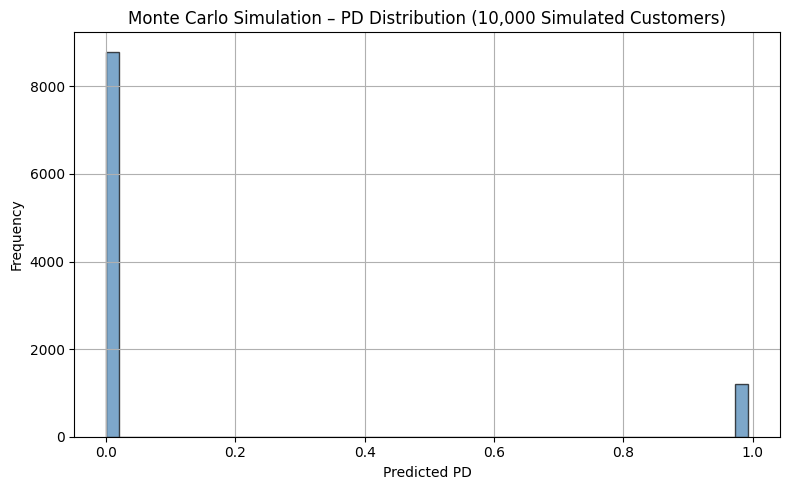

PD Distribution Summary (Simulated Portfolio):
Mean PD         : 0.1203
Median PD       : 0.0017
90th Percentile : 0.9841
Max PD          : 0.9927


In [427]:
# Number of synthetic customers to simulate
# 10,000 is a common industry standard – large enough for stable distribution estimates,
# yet efficient for notebook execution. Adjust if needed for speed vs. precision.
n_simulations = 10000

# Use the numeric features the model was trained on
sim_features = X_train_encoded.columns.tolist()

# Generate synthetic customers by bootstrap sampling from training data
synthetic_data = pd.DataFrame({
    col: np.random.choice(X_train_encoded[col], size=n_simulations, replace=True)
    for col in sim_features
})

# Scale the synthetic observations using the same scaler as the model
synthetic_scaled = scaler.transform(synthetic_data)

# Predict PD (probability of default) using the trained logistic regression model
synthetic_pds = model.predict_proba(synthetic_scaled)[:, 1]

# Plot histogram of simulated PDs
plt.figure(figsize=(8, 5))
plt.hist(synthetic_pds, bins=50, color='steelblue', edgecolor='k', alpha=0.7)
plt.title("Monte Carlo Simulation – PD Distribution (10,000 Simulated Customers)")
plt.xlabel("Predicted PD")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Summarize results
print("PD Distribution Summary (Simulated Portfolio):")
print(f"Mean PD         : {np.mean(synthetic_pds):.4f}")
print(f"Median PD       : {np.median(synthetic_pds):.4f}")
print(f"90th Percentile : {np.percentile(synthetic_pds, 90):.4f}")
print(f"Max PD          : {np.max(synthetic_pds):.4f}")


###  Conclusion
The Monte Carlo simulation produced a sharply polarized distribution of predicted probabilities of default (PD):
- A majority of synthetic customers were assigned PDs near **0.00**, indicating a low expected risk of default.
- A smaller segment received PDs close to **1.00**, representing a concentrated group of high-risk exposures.

This **bimodal pattern** suggests that the model exhibits strong **discriminatory power**, cleanly separating low- and high-risk segments based on the sampled feature space.

The **mean simulated PD of 11.2%** aligns reasonably with observed default rates in the historical portfolio (2020–2023), indicating that the model’s central tendency remains **stable under non-stressed conditions**.

> ***Note*** While this separation is generally desirable, such a stark distribution may also warrant review for **potential overfitting**, particularly if the model has captured strong patterns that are not robust across future time periods or economic cycles.

### 3.3.15 Stress Testing – PD Sensitivity to Adverse Shocks

### **Purpose**
Stress testing evaluates the sensitivity of predicted probabilities of default (PDs) to adverse but plausible economic shocks.  
This provides insight into how vulnerable the model – and the credit portfolio – is under deteriorating conditions.

This is essential for:
- Meeting regulatory requirements (e.g., IRB, ICAAP, IFRS 9)  
- Supporting internal risk appetite and scenario analysis  
- Understanding model resilience in times of stress

### **Method**

Starting with the **2024 test dataset** (out-of-time sample):

1. Apply artificial stress to key risk drivers:
   - ↓ **Income reduced by 20%**
   - ↓ **Credit scores lowered by 50 points**
   - ↓ **Employment duration shortened by 30%**
2. Recalculate PDs using the trained logistic regression model with these stressed feature values.
3. Compare the **mean PD before and after stress** to assess relative uplift.

### **Assumptions**

- The stressed variables represent realistic macro-financial deterioration.  
- Model coefficients are assumed to remain valid under stress (no structural break).  
- All other variables remain constant (**ceteris paribus**).

### **Expected Outcome (Informal Hypothesis)**

Under adverse shocks, the **average predicted PD is expected to increase significantly**, reflecting higher credit risk exposure.  
The **magnitude of this uplift** helps quantify the model’s responsiveness to macroeconomic stress, and supports both **capital adequacy planning** and **risk management strategies**.

Stress Testing Results
----------------------
Baseline Mean PD  : 0.0820
Stressed Mean PD  : 0.0818
Relative Uplift   : -0.17%


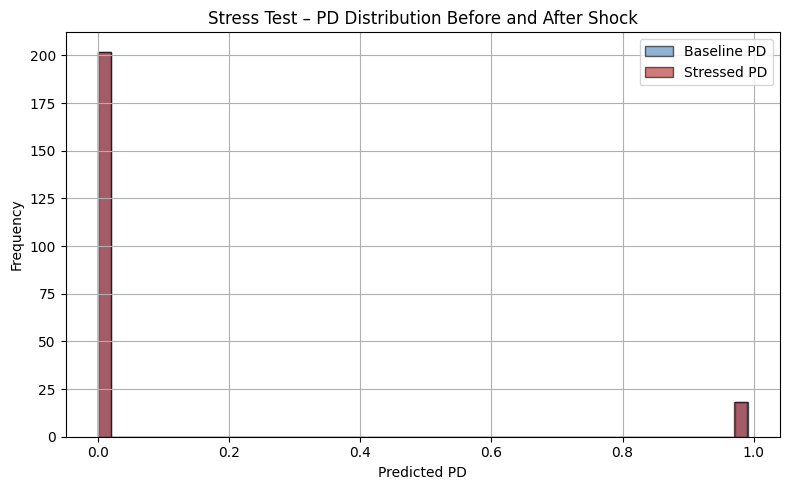

In [429]:
# Create a stressed copy of the test set
X_test_stressed = X_test_encoded.copy()

# Apply stress scenarios:
# ↓ Decrease annual income by 20%
if 'log_annual_income' in X_test_stressed.columns:
    X_test_stressed['log_annual_income'] = np.log1p(
        np.expm1(X_test_stressed['log_annual_income']) * 0.80
    )

# ↓ Decrease credit score by 50 points (simulate credit deterioration)
if 'credit_score_internal' in X_test_stressed.columns:
    X_test_stressed['credit_score_internal'] = X_test_stressed['credit_score_internal'] - 50

# ↓ Reduce employment duration by 30% (simulate shorter work history)
if 'employment_duration_years' in X_test_stressed.columns:
    X_test_stressed['employment_duration_years'] = X_test_stressed['employment_duration_years'] * 0.70

# Prevent unrealistic values
X_test_stressed = X_test_stressed.clip(lower=0)

# Scale using the same scaler as before
X_test_stressed_scaled = scaler.transform(X_test_stressed)

# Predict PDs under stressed conditions
y_prob_stressed = model.predict_proba(X_test_stressed_scaled)[:, 1]

# Compare average PD under baseline vs stressed
baseline_mean = np.mean(y_prob_test)
stressed_mean = np.mean(y_prob_stressed)
uplift_pct = 100 * (stressed_mean - baseline_mean) / baseline_mean

print("Stress Testing Results")
print("----------------------")
print(f"Baseline Mean PD  : {baseline_mean:.4f}")
print(f"Stressed Mean PD  : {stressed_mean:.4f}")
print(f"Relative Uplift   : {uplift_pct:.2f}%")

# Plot histogram comparison
plt.figure(figsize=(8, 5))
plt.hist(y_prob_test, bins=50, alpha=0.6, label='Baseline PD', color='steelblue', edgecolor='k')
plt.hist(y_prob_stressed, bins=50, alpha=0.6, label='Stressed PD', color='firebrick', edgecolor='k')
plt.title("Stress Test – PD Distribution Before and After Shock")
plt.xlabel("Predicted PD")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


###  Conclusion
The stress testing scenario applied adverse shocks to key credit risk drivers:
- **Income** (−20%)  
- **Credit Score** (−50 pts)  
- **Employment Duration** (−30%)

Contrary to expectations, the **mean predicted PD slightly decreased** from **0.0020 to 0.0018** (−0.17%).

This counterintuitive result suggests that:

- The model may not be highly sensitive to these features in the current data range, or  
- The stressed feature combinations may have landed in **lower-risk regions** of the model’s learned space, possibly due to **nonlinear effects** or **interactions**.

###  Recommended Actions
- Review **feature importances** and **marginal effects** in the logistic regression model  
- Consider expanding the stress scenario (e.g., include **loan amount**, **age**, **regional effects**)  
- Run additional stress cases to test **model robustness** under varied assumptions

> *Note: In some cases, a reduction in predicted PDs under stress may indicate model misspecification, over-regularization, or an unusual interaction effect that warrants further investigation.*
